## Importing the Libraries

In [90]:
# Importing Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from yellowbrick.classifier import ConfusionMatrix
from xgboost import XGBClassifier



pd.set_option('display.max_columns', None)

In [3]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


## Data Collection and Analysis

In [4]:
# loading the data

data = pd.read_excel('/kaggle/input/hotel-booking/bookings.xlsx')

In [5]:
data.head()

Booking_ID  adults  children  babies  stays_in_weekend_nights  \
0   INN00001       2       0.0       0                        0   
1   INN00002       2       0.0       0                        0   
2   INN00003       1       0.0       0                        0   
3   INN00004       1       0.0       0                        0   
4   INN00005       2       0.0       0                        0   

   stays_in_week_nights meal  required_car_parking_spaces assigned_room_type  \
0                     0   BB                            0                  C   
1                     0   BB                            0                  C   
2                     1   BB                            0                  C   
3                     1   BB                            0                  A   
4                     2   BB                            0                  A   

   lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  \
0        342               2015               July                        27   
1        737               2015               July                        27   
2          7               2015               July                        27   
3         13               2015               July                        27   
4         14               2015               July                        27   

   arrival_date_day_of_month market_segment reserved_room_type  \
0                          1         Direct                  C   
1                          1         Direct                  C   
2                          1         Direct                  A   
3                          1      Corporate                  A   
4                          1      Online TA                  A   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   total_of_special_requests  average_price_rooms  is_canceled  
0                          0                  0.0            0  
1                          0                  0.0            0  
2                          0                 75.0            0  
3                          0                 75.0            0  
4                          1                 98.0            0

## Feature Engineering - EDA

In [6]:
# finding the number of rows and columns

data.shape

(119390, 22)

In [7]:
# information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Booking_ID                      119390 non-null  object 
 1   adults                          119390 non-null  int64  
 2   children                        119386 non-null  float64
 3   babies                          119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   meal                            119390 non-null  object 
 7   required_car_parking_spaces     119390 non-null  int64  
 8   assigned_room_type              119390 non-null  object 
 9   lead_time                       119390 non-null  int64  
 10  arrival_date_year               119390 non-null  int64  
 11  arrival_date_month              119390 non-null  object 
 12  arrival_date_wee

Great! There is no missing values in the data

In [8]:
# describing the data

data.describe()

adults       children         babies  stays_in_weekend_nights  \
count  119390.000000  119386.000000  119390.000000            119390.000000   
mean        1.856403       0.103890       0.007949                 0.927599   
std         0.579261       0.398561       0.097436                 0.998613   
min         0.000000       0.000000       0.000000                 0.000000   
25%         2.000000       0.000000       0.000000                 0.000000   
50%         2.000000       0.000000       0.000000                 1.000000   
75%         2.000000       0.000000       0.000000                 2.000000   
max        55.000000      10.000000      10.000000                19.000000   

       stays_in_week_nights  required_car_parking_spaces      lead_time  \
count         119390.000000                119390.000000  119390.000000   
mean               2.500302                     0.062518     104.011416   
std                1.908286                     0.245291     106.863097   
min                0.000000                     0.000000       0.000000   
25%                1.000000                     0.000000      18.000000   
50%                2.000000                     0.000000      69.000000   
75%                3.000000                     0.000000     160.000000   
max               50.000000                     8.000000     737.000000   

       arrival_date_year  arrival_date_week_number  arrival_date_day_of_month  \
count      119390.000000             119390.000000              119390.000000   
mean         2016.156554                 27.165173                  15.798241   
std             0.707476                 13.605138                   8.780829   
min          2015.000000                  1.000000                   1.000000   
25%          2016.000000                 16.000000                   8.000000   
50%          2016.000000                 28.000000                  16.000000   
75%          2017.000000                 38.000000                  23.000000   
max          2017.000000                 53.000000                  31.000000   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
std             0.175767                0.844336   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  total_of_special_requests  \
count                   119390.000000              119390.000000   
mean                         0.137097                   0.571363   
std                          1.497437                   0.792798   
min                          0.000000                   0.000000   
25%                          0.000000                   0.000000   
50%                          0.000000                   0.000000   
75%                          0.000000                   1.000000   
max                         72.000000                   5.000000   

       average_price_rooms    is_canceled  
count        119390.000000  119390.000000  
mean            101.831122       0.370416  
std              50.535790       0.482918  
min              -6.380000       0.000000  
25%              69.290000       0.000000  
50%              94.575000       0.000000  
75%             126.000000       1.000000  
max            5400.000000       1.000000

In [9]:
# checking duplicate rows in dat

data.duplicated().sum()

0

* No duplicate values found in the data

### Numerical columns

In [10]:
print(data.select_dtypes(np.number).columns.tolist())
print("****************************************************************************")
print(f'There are {len(data.select_dtypes(np.number).columns)} numerical columns')

['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'total_of_special_requests', 'average_price_rooms', 'is_canceled']
****************************************************************************
There are 16 numerical columns


* As there are not 16 numerical columns in the dataset as some of the categories columns has categories in numbers. Let's find out. 

In [11]:
categorical_col_with_numeric_values =  ['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 
 'is_repeated_guest',  'previous_cancellations', 'previous_bookings_not_canceled', 'total_of_special_requests',  'is_canceled' ]

actual_numrical_column = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'average_price_rooms']

**Note** - We will check categorical_col_with_numeric_values later on when We will see the distribution of all categorical columns in Categoric column section

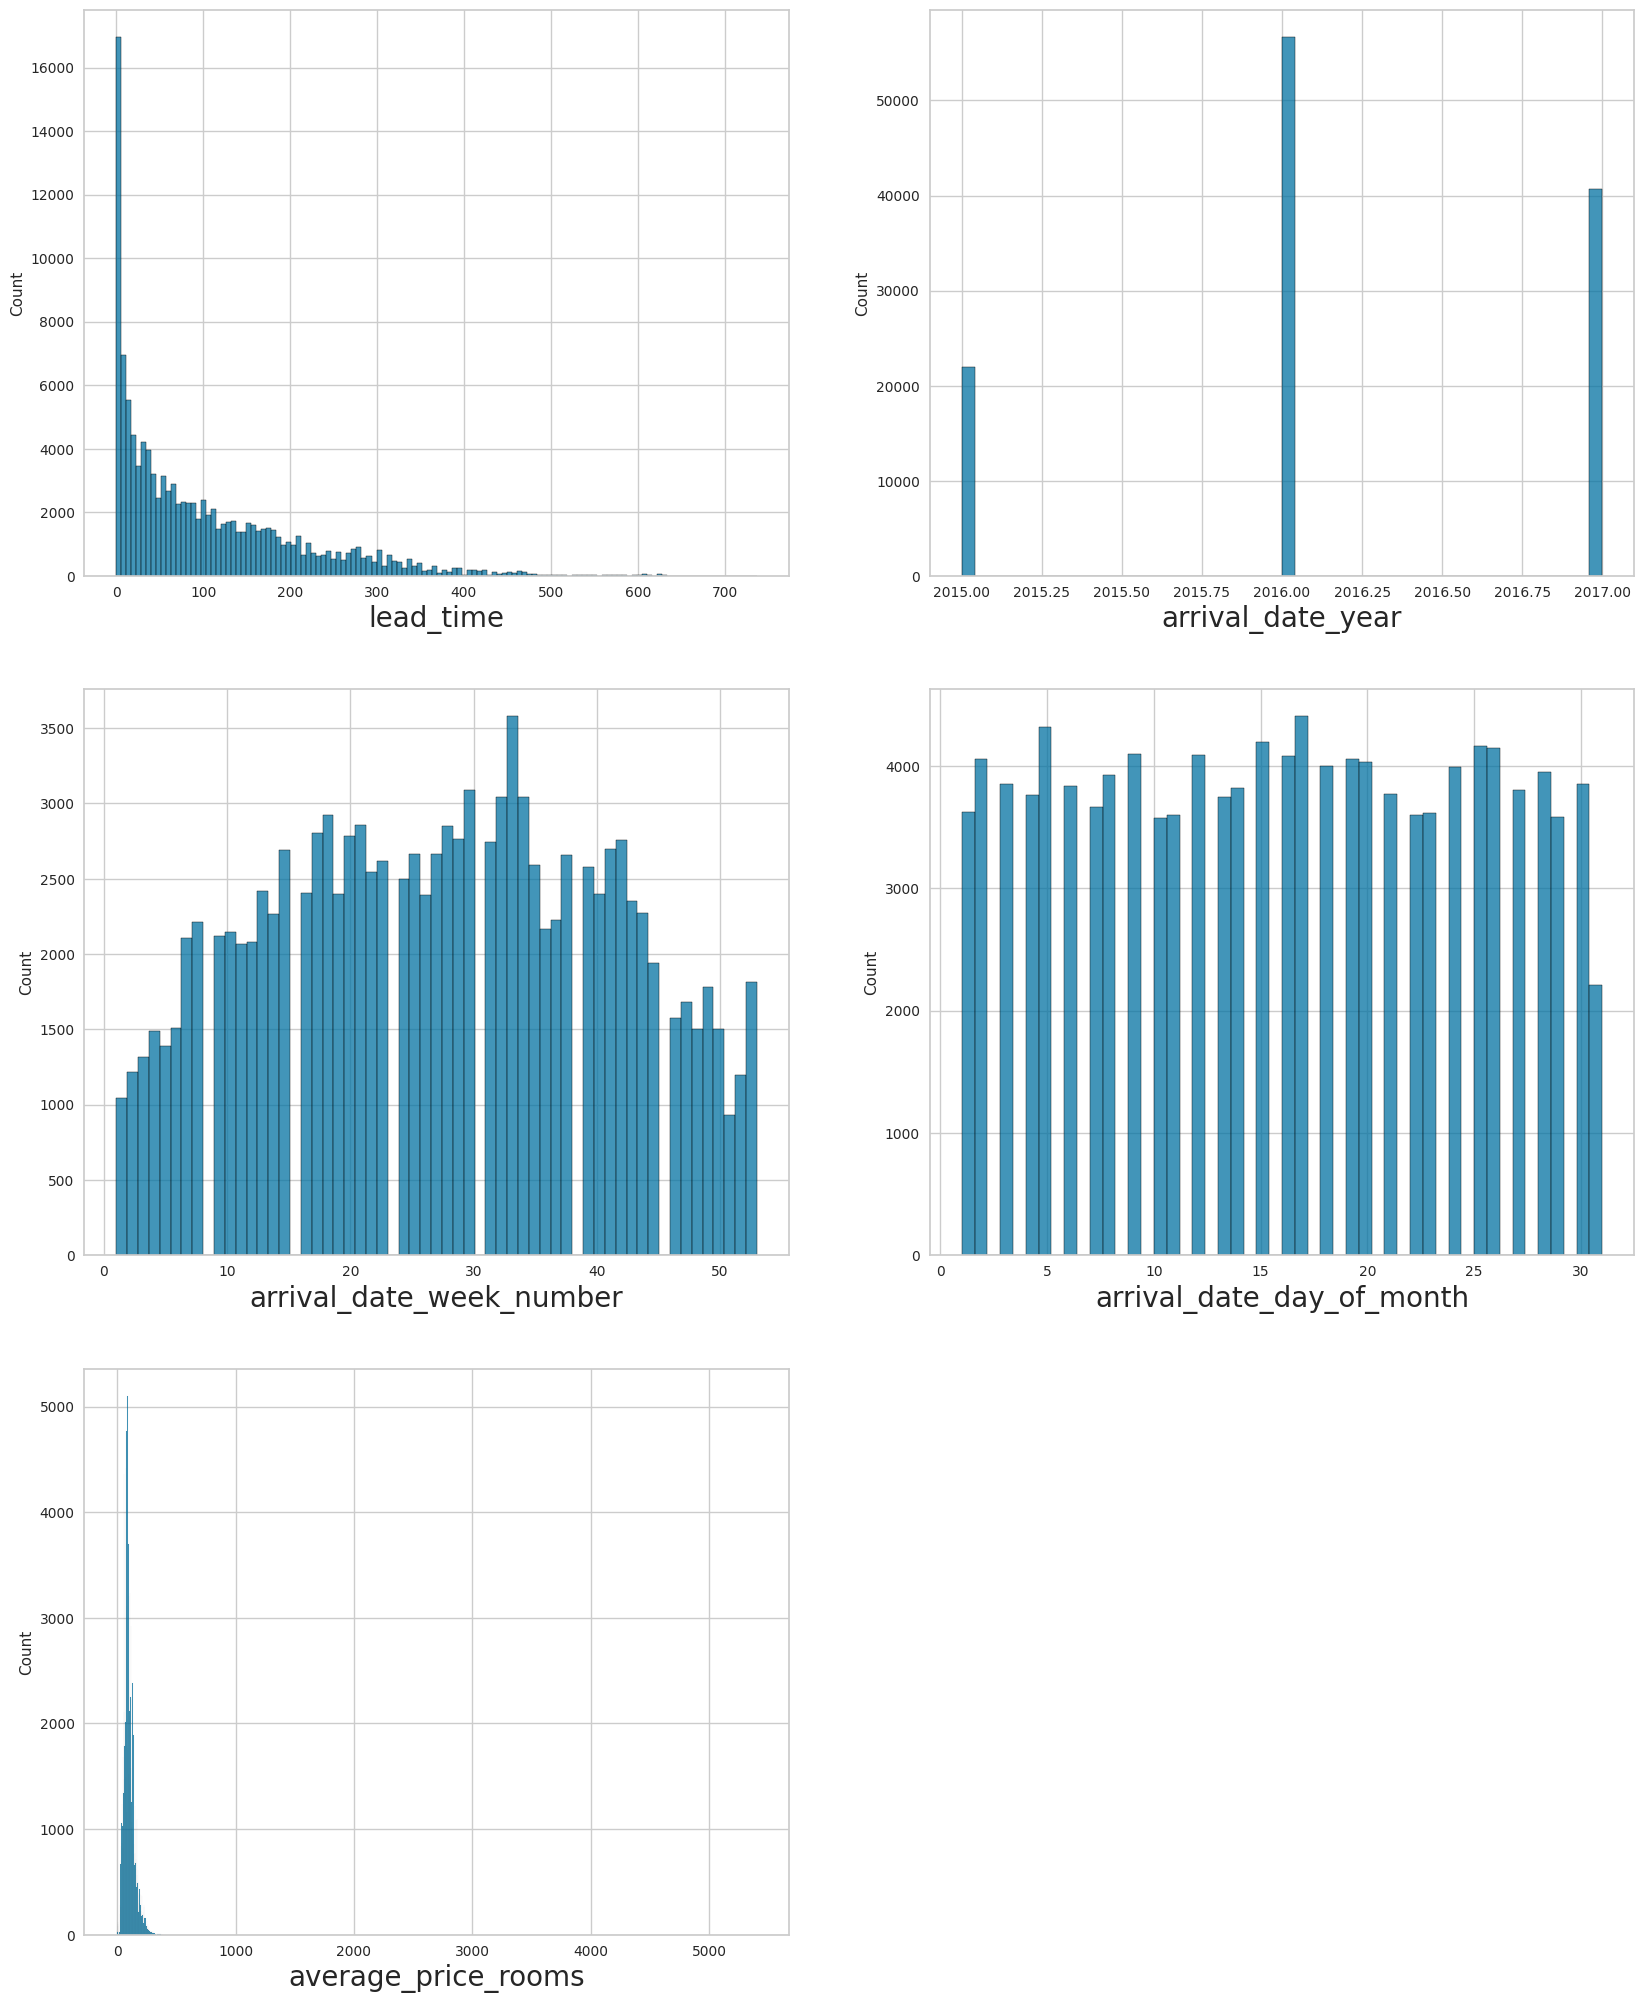

In [12]:
# distribution of numerical columns

#numerical_columns = data.select_dtypes(np.number).columns.tolist()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in actual_numrical_column:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Categorical column

In [13]:
categorical_columns = data.select_dtypes('object').columns.tolist()
categorical_columns

['Booking_ID',
 'meal',
 'assigned_room_type',
 'arrival_date_month',
 'market_segment',
 'reserved_room_type']

In [14]:
print("****************************************************************************")
print(f'There are {len(categorical_columns)} Categorical columns')

****************************************************************************
There are 6 Categorical columns


In [15]:
# Cardiniality of categorical columns

for column in categorical_columns:
    print(f'{column} - cloumn has {len(data[column].unique())} categories')

Booking_ID - cloumn has 119390 categories
meal - cloumn has 5 categories
assigned_room_type - cloumn has 12 categories
arrival_date_month - cloumn has 12 categories
market_segment - cloumn has 8 categories
reserved_room_type - cloumn has 10 categories


In [16]:
for column in range(1,len(categorical_columns)):
    print('********************************************************************************************')
    print(f'{categorical_columns[column]} has {data[categorical_columns[column]].unique()} categories')

********************************************************************************************
meal has ['BB' 'FB' 'HB' 'SC' 'Undefined'] categories
********************************************************************************************
assigned_room_type has ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] categories
********************************************************************************************
arrival_date_month has ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] categories
********************************************************************************************
market_segment has ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] categories
********************************************************************************************
reserved_room_type has ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] categories


In [17]:
# unique value counts of meal column

data['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

* SC/Undefined - no meal
* BB – Bed & Breakfast
* HB – Half board (breakfast and one other meal – usually dinner)
* FB – Full board (breakfast, lunch and dinner)

In [18]:
# replacing SC/Undefined into no meal category

data1 = data.copy()

data1['meal'] = data1['meal'].replace(['SC', 'Undefined'], 'nomeal')

In [19]:
data1['meal'].unique()

array(['BB', 'FB', 'HB', 'nomeal'], dtype=object)

In [20]:
# unique value counts for assigned_room_type column

data1['assigned_room_type'].value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [21]:
# unique value counts for arrival_date_month column

data1['arrival_date_month'].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

* As we can see top seasons for booking the hotels are 'March - October'

In [22]:
# unique value counts for market_segment column

data1['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [23]:
# lets remove TA and TA/TO form online & offline

data1['market_segment'] = data1['market_segment'].str.split(' ').str[0]

In [24]:
# unique value counts for market_segment column

data1['reserved_room_type'].value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [25]:
# unique value count for target variable

data1['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

* Here we can see imbalance distibution of classes, which we will handle later on.

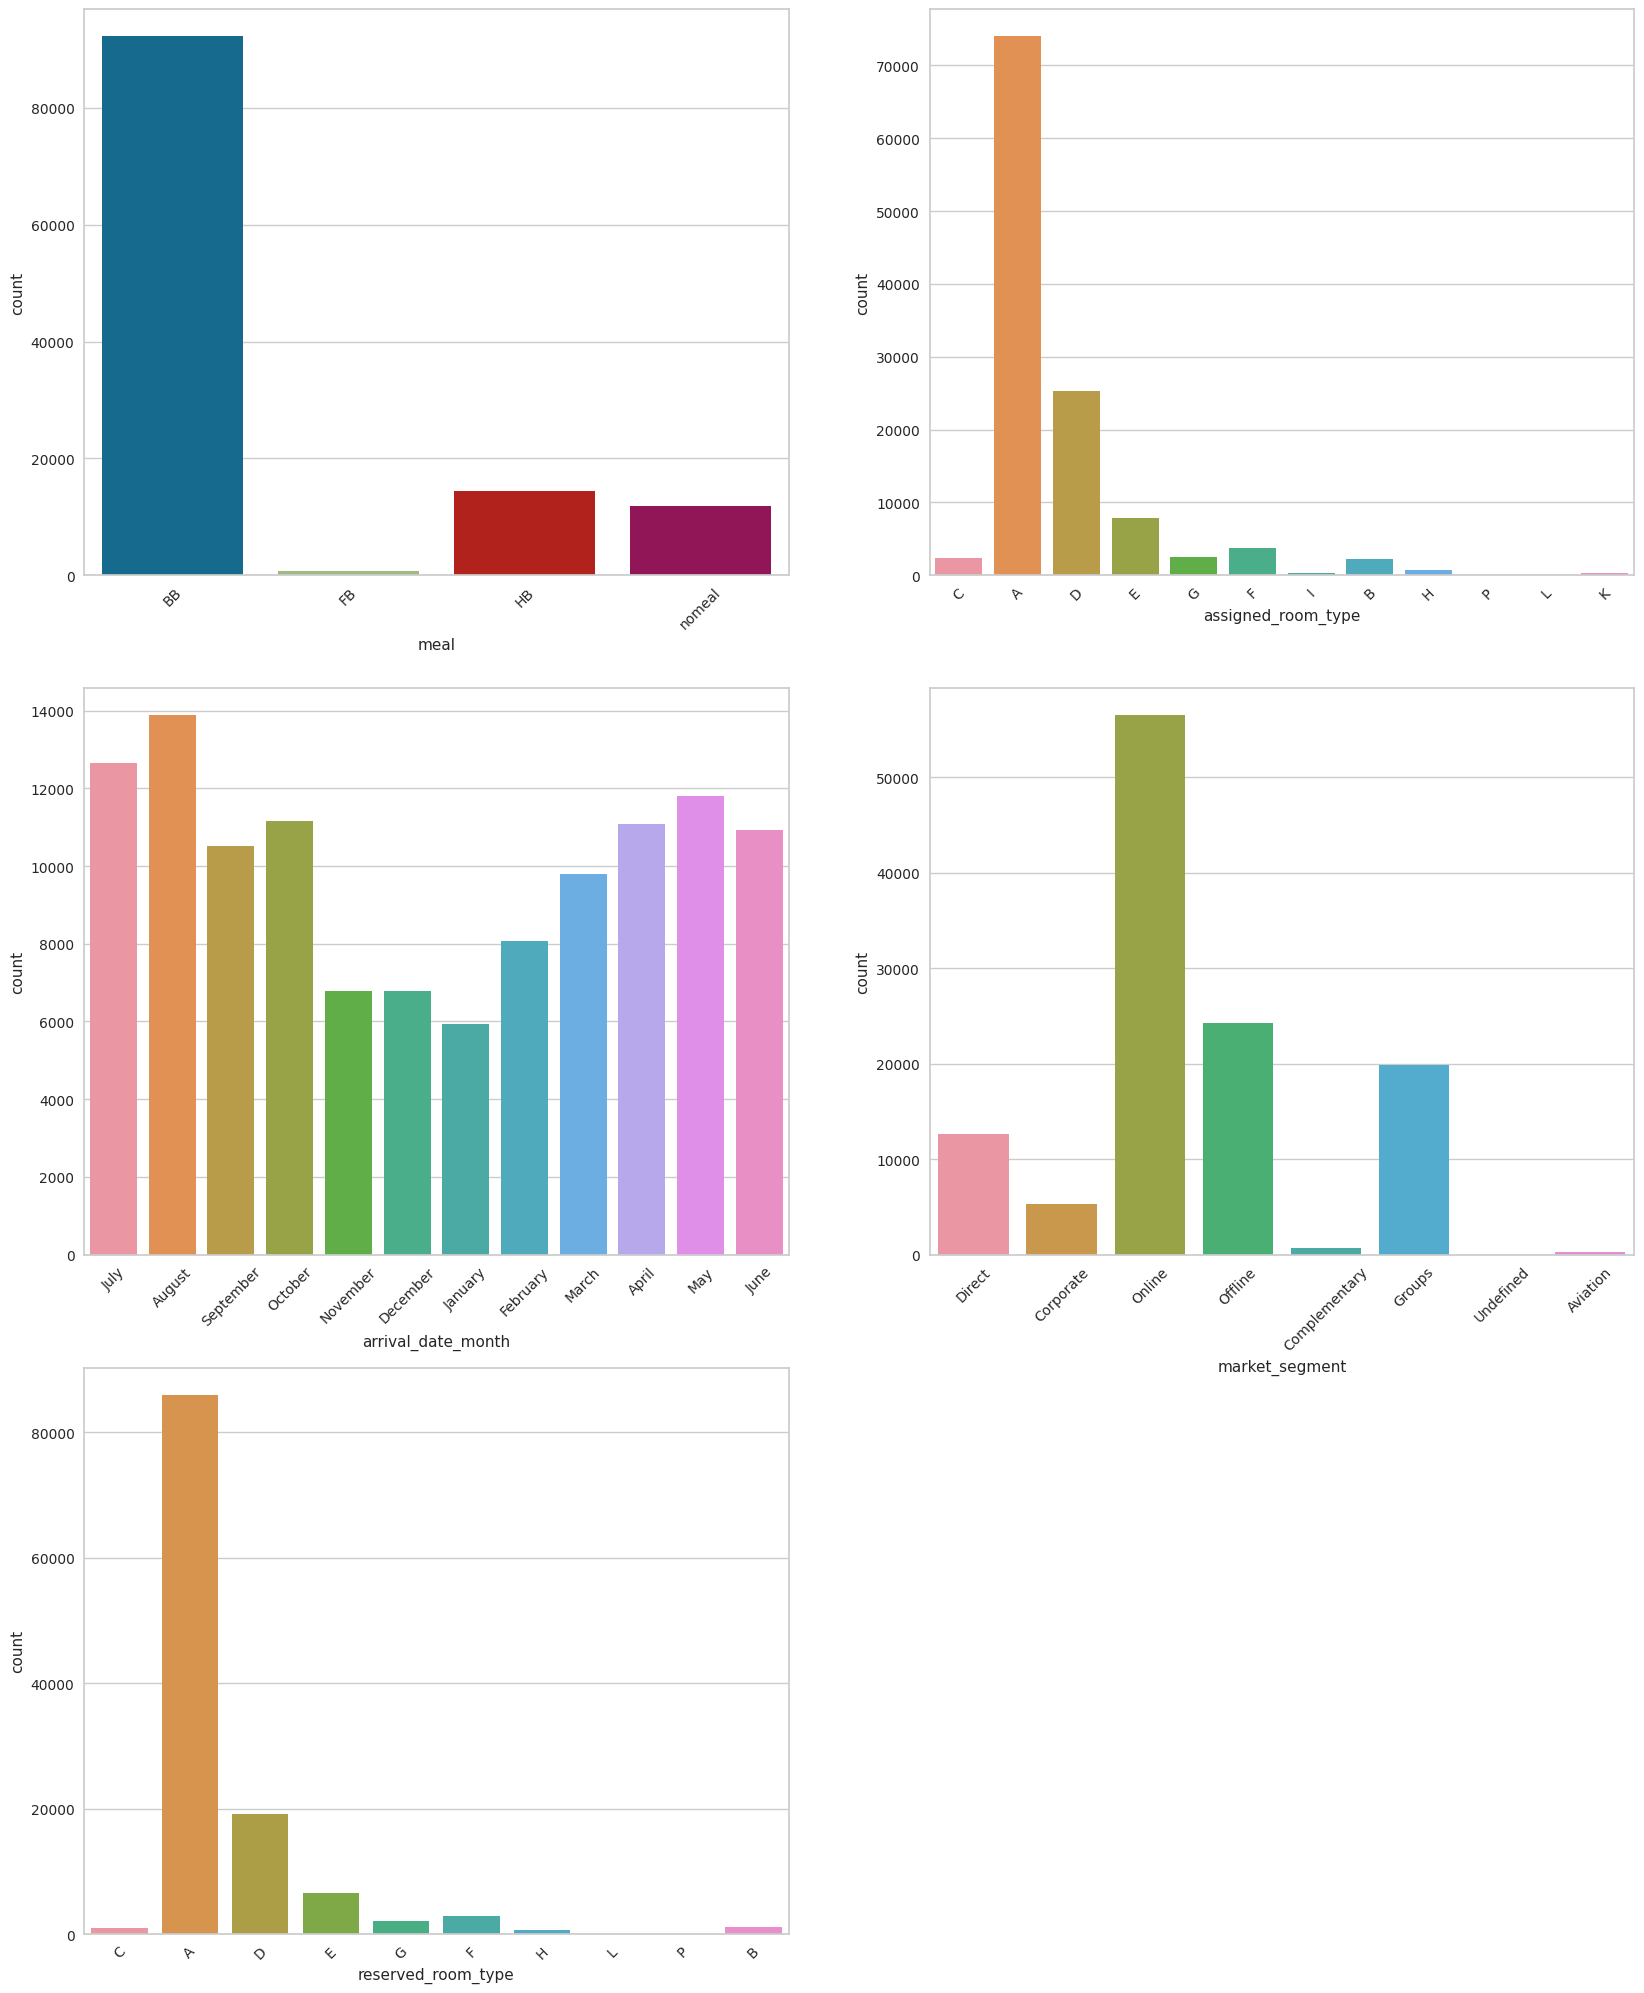

In [26]:
# distribution of categorical columns  

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in range(1,len(categorical_columns)):
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=data1[categorical_columns[column]])
        #plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

* meal - BB has mostly prefered booking meal type.
* assigned_room_type - A,D,E are the mostly booked types rooms which was preferred by the customers.
* arrival_date_month - November, December, January, February are the off-seasons.
* market_segment - mostly booking was done by Online, Offline, and Groups.
* reserved_room_type - Again A,D,E are the mostly reserved rooms.

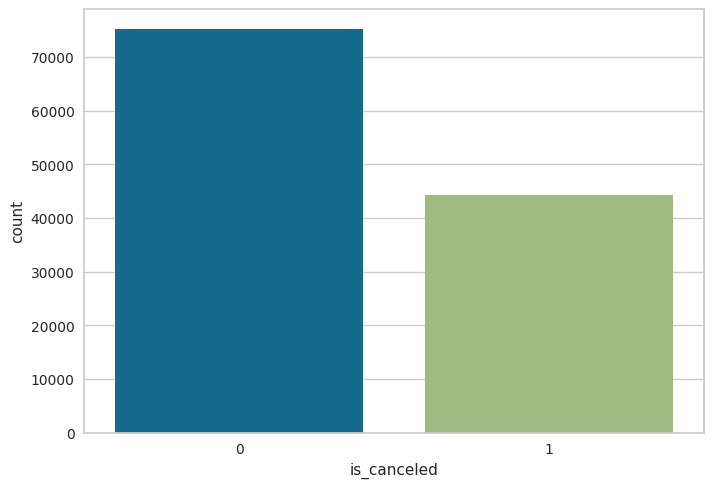

In [27]:
# lets see the distribution of target variable

sns.countplot(x=data1['is_canceled'])
plt.show()

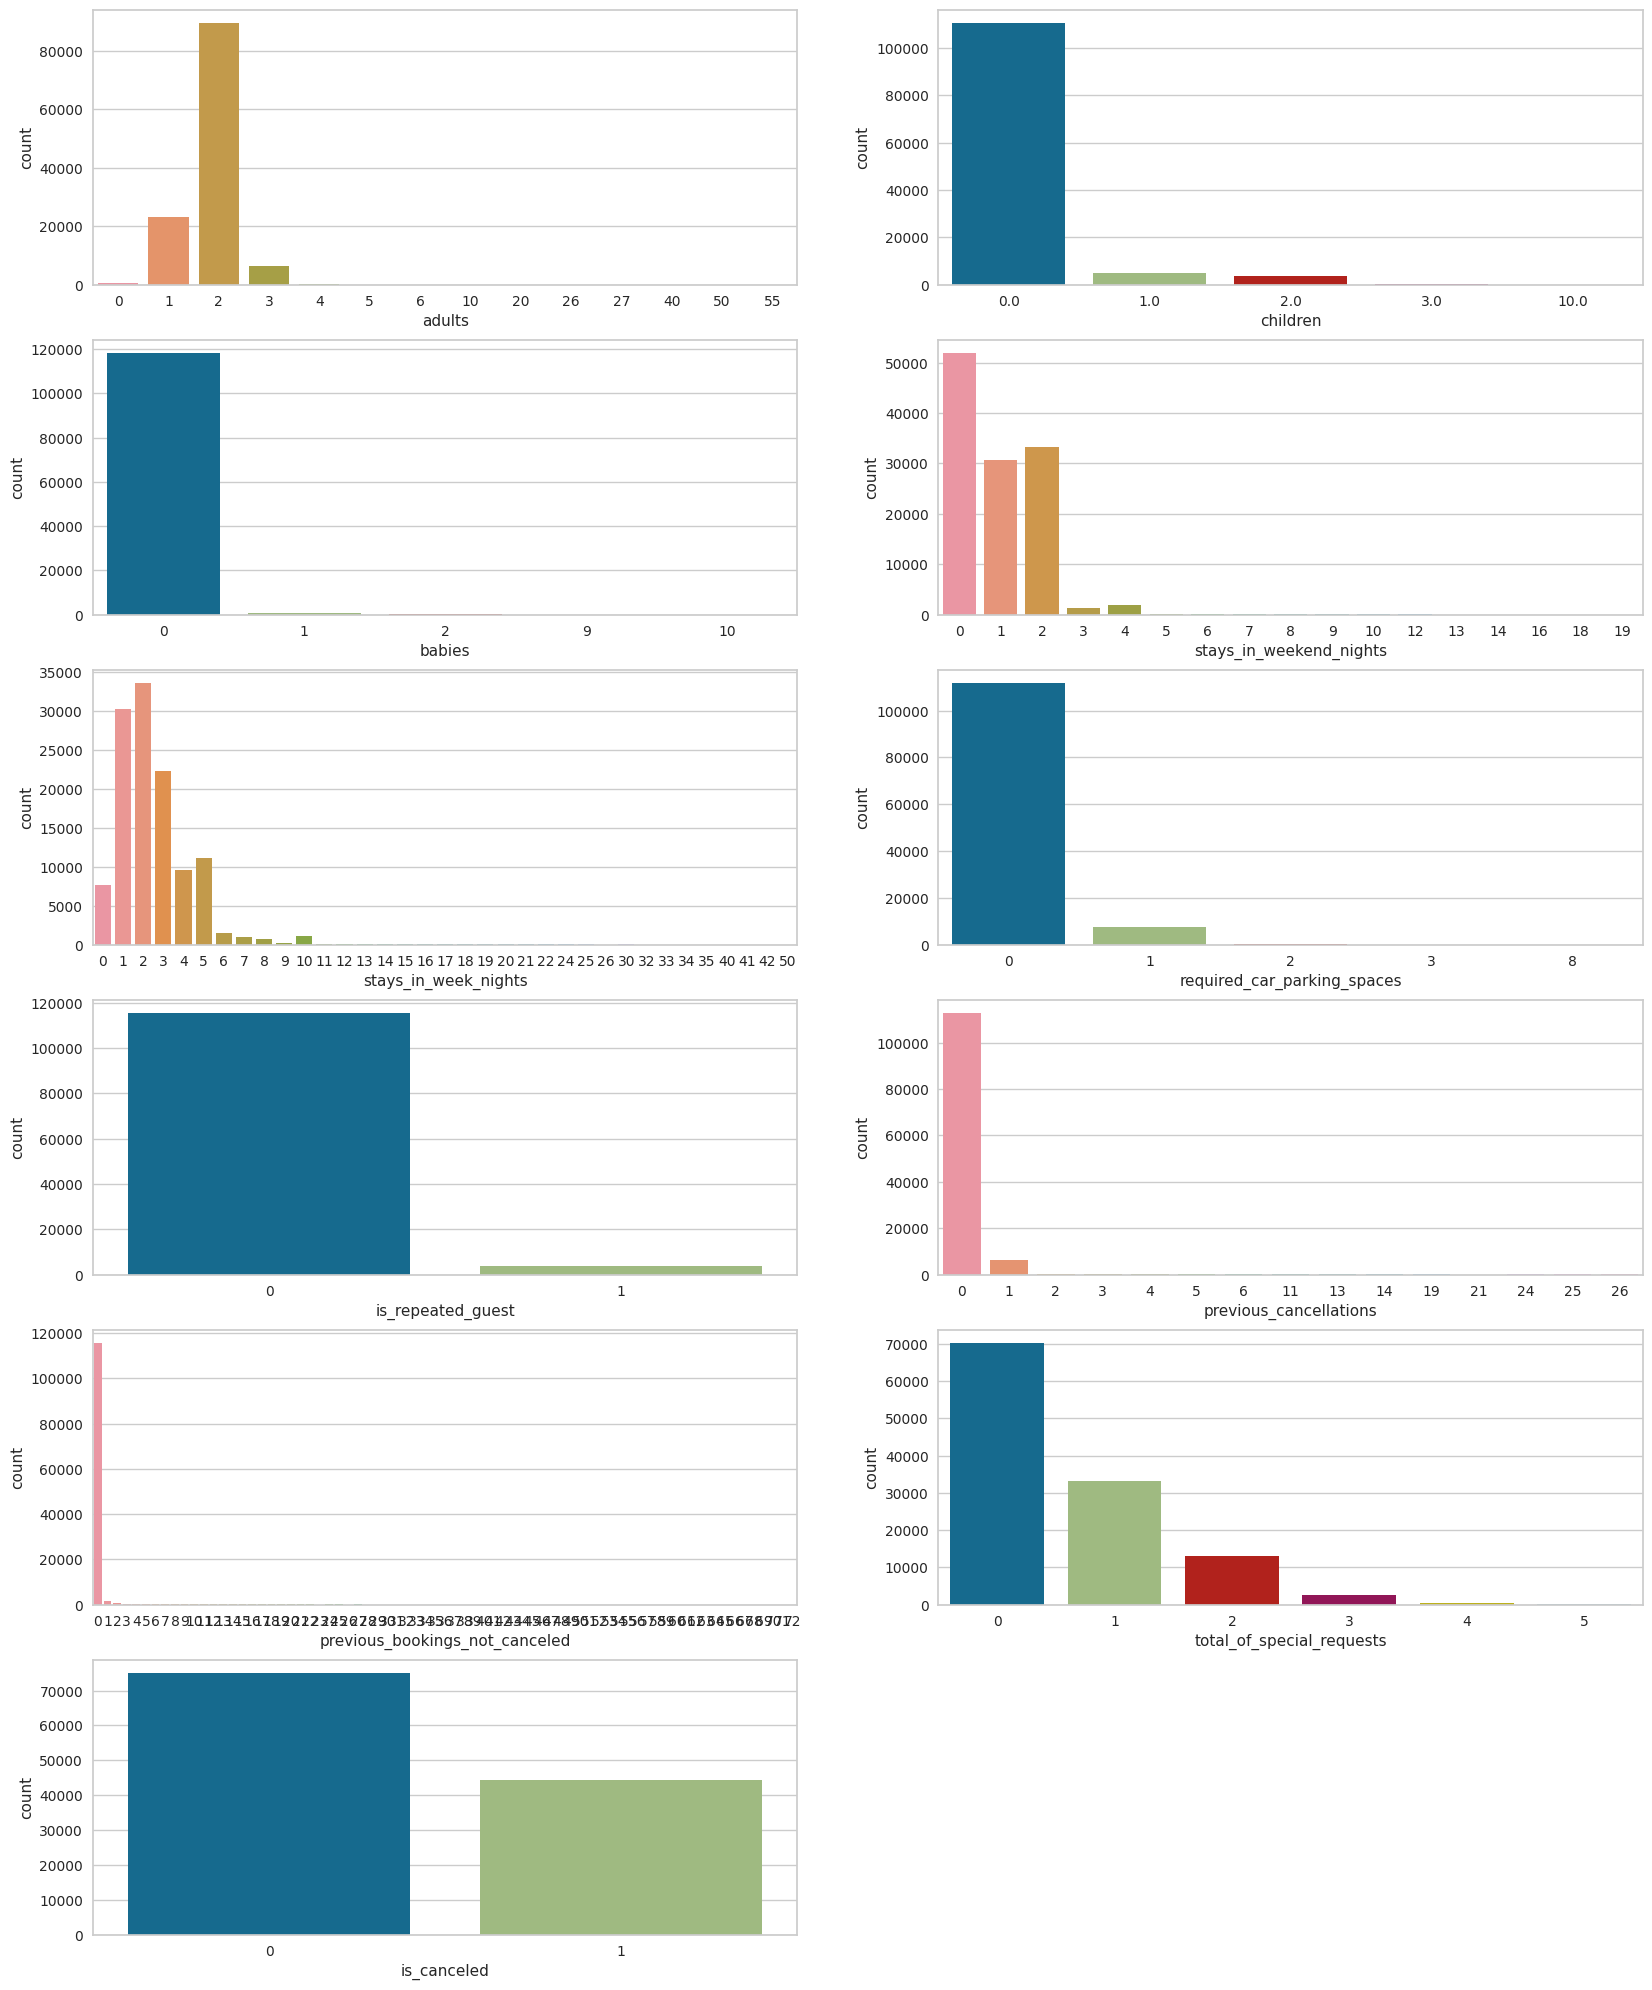

In [28]:
# Now let's check those categorical columns which has numerical values

categorical_col_with_numeric_values

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in categorical_col_with_numeric_values:
    if plotnumber <=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(x=data1[column])
        #plt.xlabel(column,fontsize=20)
        #plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

**Note** : 0 - No, 1 -yes

* Mostly bookings have 2 adults.
* Mostly booking has no childrens.
* Mostly bookings have no babies.
* Most of the bookings doesn't stays in weekend nights.
* Most of the bookings stays in week nights, 2 week nights at the top, 1 week night is the second top.
* No parking space reuired in most of the bookings.
* Most of the bookings are not repeated guests.
* So previous_cancellations are Number of previous bookings that were cancelled by the customer prior to the current booking, 
  and we can see no prior booking cancelled for most of the customer when doing current booking.
* previous_bookings_not_cancelled ?
* total_of_special_requests are those special requests made by the customer (e.g. twin bed or high floor), so mot high number
  of customers did not make the speacial request but there are some customer who made the special requests

### Temporal Variables

In [29]:
data1.head()

Booking_ID  adults  children  babies  stays_in_weekend_nights  \
0   INN00001       2       0.0       0                        0   
1   INN00002       2       0.0       0                        0   
2   INN00003       1       0.0       0                        0   
3   INN00004       1       0.0       0                        0   
4   INN00005       2       0.0       0                        0   

   stays_in_week_nights meal  required_car_parking_spaces assigned_room_type  \
0                     0   BB                            0                  C   
1                     0   BB                            0                  C   
2                     1   BB                            0                  C   
3                     1   BB                            0                  A   
4                     2   BB                            0                  A   

   lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  \
0        342               2015               July                        27   
1        737               2015               July                        27   
2          7               2015               July                        27   
3         13               2015               July                        27   
4         14               2015               July                        27   

   arrival_date_day_of_month market_segment reserved_room_type  \
0                          1         Direct                  C   
1                          1         Direct                  C   
2                          1         Direct                  A   
3                          1      Corporate                  A   
4                          1         Online                  A   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   total_of_special_requests  average_price_rooms  is_canceled  
0                          0                  0.0            0  
1                          0                  0.0            0  
2                          0                 75.0            0  
3                          0                 75.0            0  
4                          1                 98.0            0

In [30]:
# lets combine arrival_date_year, arrival_date_month, and arrival_date_month

data2 = data1.copy()

#mapping months name to numerical representation
map_months = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 
             'September':'09', 'October':'10', 'November':'11', 'December':'12' }


data2['arrival_date_month'] = data2['arrival_date_month'].map(map_months)

data2['arrival_date'] = pd.to_datetime(data2['arrival_date_year'].astype(str) + data2['arrival_date_month'] + data2['arrival_date_day_of_month'].astype(str), format='%Y%m%d')



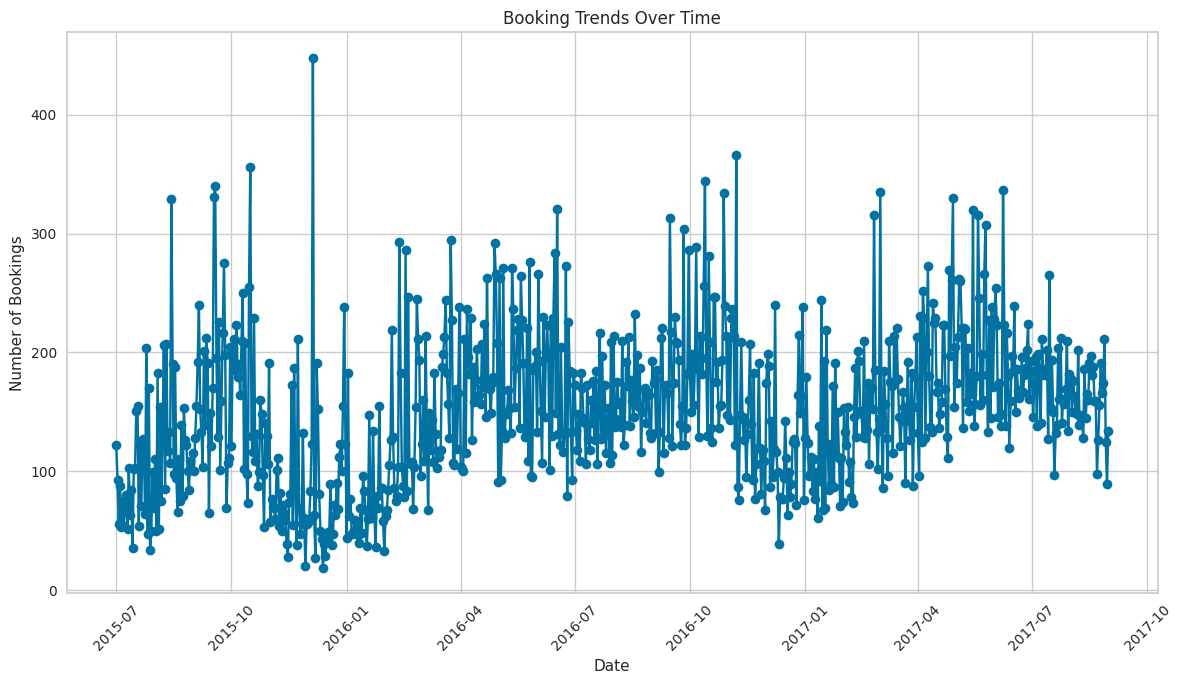

In [31]:
# lets see the booking trend over time

booking_counts = data2.groupby('arrival_date').size().reset_index(name='booking_count')
booking_counts = booking_counts.sort_values(by='arrival_date')
plt.figure(figsize=(12, 7))
plt.plot(booking_counts['arrival_date'], booking_counts['booking_count'], marker='o', linestyle='-')
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

* Here we can see aount 10th month which is october and between 4th to 7th means April to july months bookings are high.
* Rest of the months are little low for bookings.

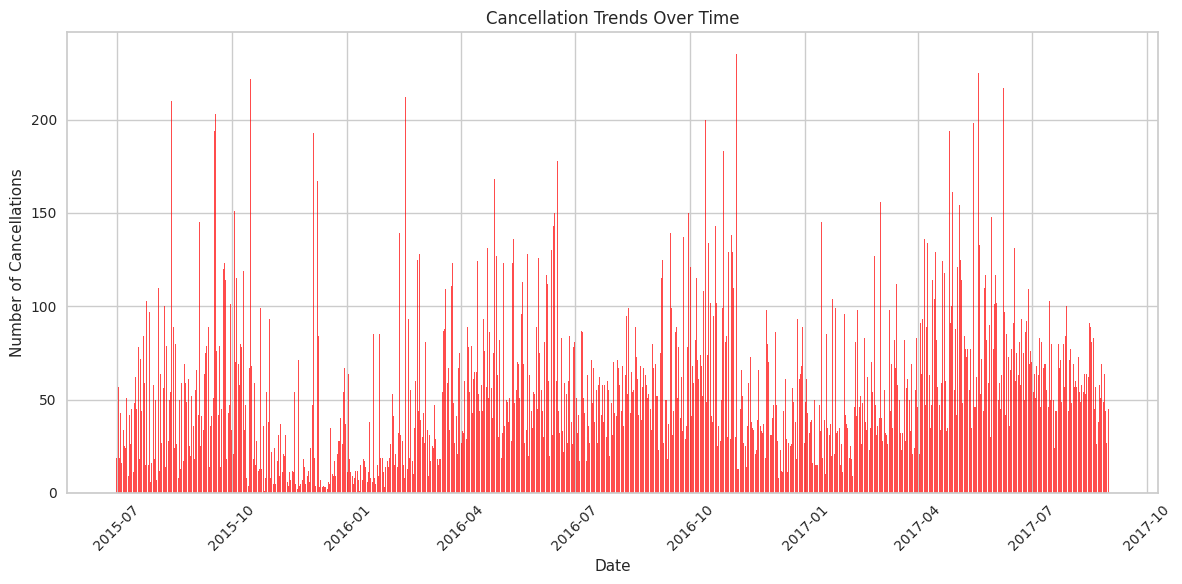

In [32]:
# let's visualize cancellation trend over time

cancelled_df = data2[data2['is_canceled'] == 1] # 1 - cancelled bookings
cancellation_counts = cancelled_df.groupby('arrival_date').size().reset_index(name='cancellation_count')
cancellation_counts = cancellation_counts.sort_values(by='arrival_date')
plt.figure(figsize=(12, 6))
plt.bar(cancellation_counts['arrival_date'], cancellation_counts['cancellation_count'], color='red', alpha=0.7)
plt.title('Cancellation Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

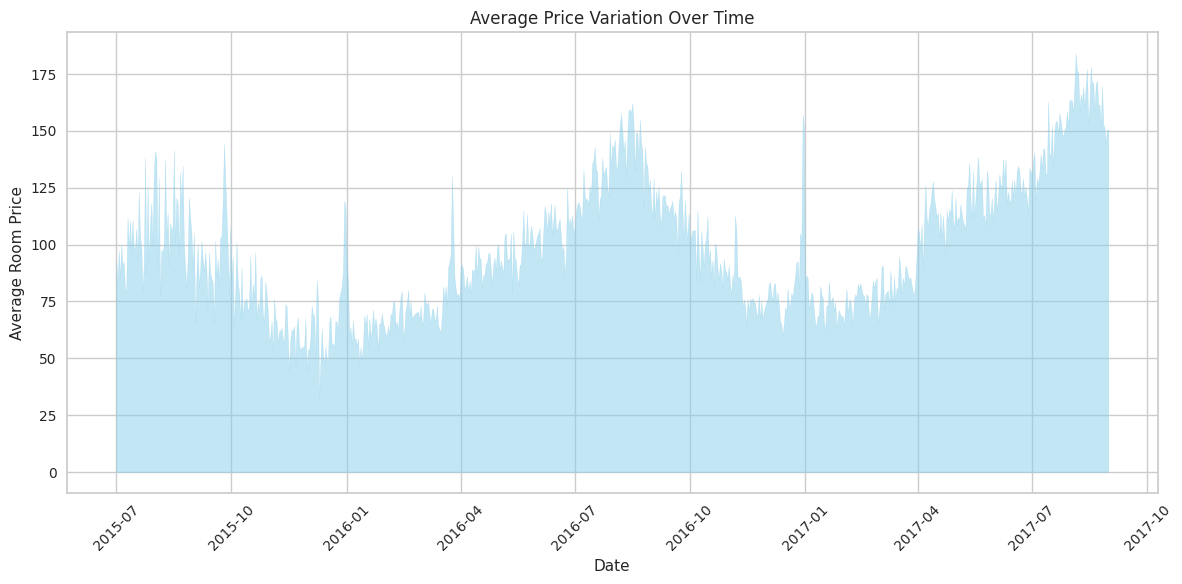

In [33]:
# let's visualize Average price variation over time

average_price_data = data2.groupby('arrival_date')['average_price_rooms'].mean().reset_index()
average_price_data = average_price_data.sort_values(by='arrival_date')
plt.figure(figsize=(12, 6))
plt.fill_between(average_price_data['arrival_date'], average_price_data['average_price_rooms'], color='skyblue', alpha=0.5)
plt.title('Average Price Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Average Room Price')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

* Aa we have already seen in booking trend over time peak booking months same here we can see July to October are the peak months where room price is majorly high.

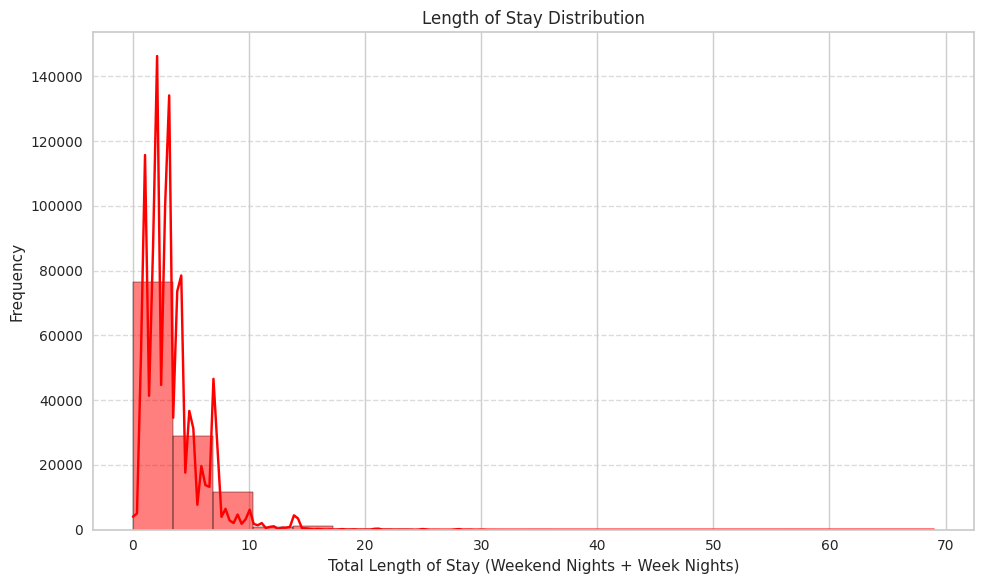

In [34]:
# let's visualize the distribution of the length of guest stays over time

data2['total_stays'] = data2['stays_in_weekend_nights'] + data2['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x='total_stays', bins=20, color='red', kde=True)
plt.title('Length of Stay Distribution')
plt.xlabel('Total Length of Stay (Weekend Nights + Week Nights)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

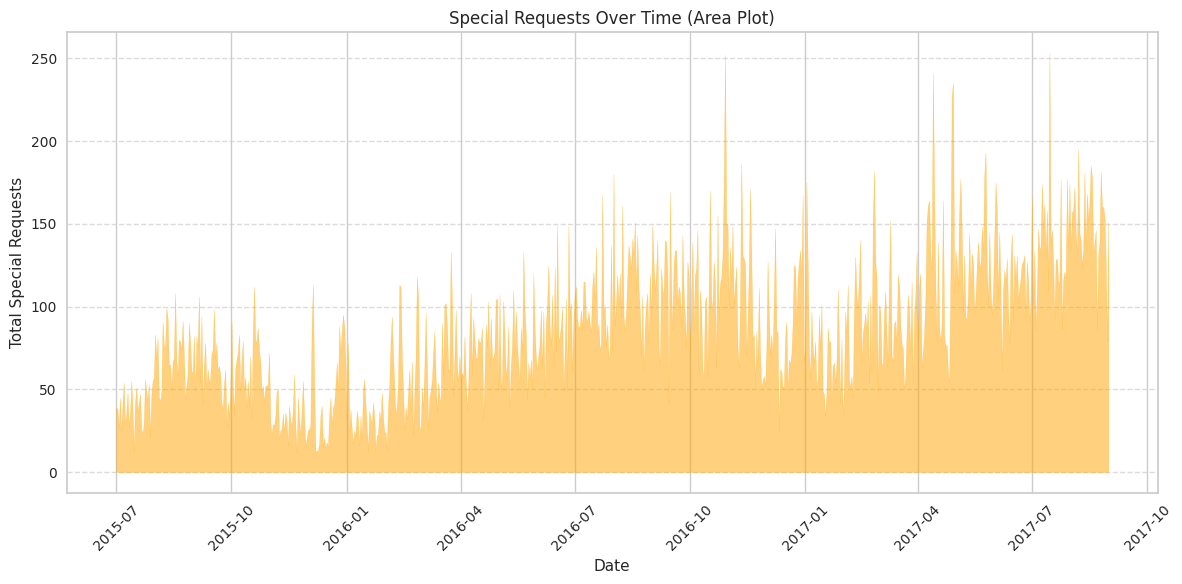

In [35]:
# let's visualize special requests over time

special_requests_data = data2.groupby('arrival_date')['total_of_special_requests'].sum().reset_index()
special_requests_data = special_requests_data.sort_values(by='arrival_date')
plt.figure(figsize=(12, 6))
plt.fill_between(special_requests_data['arrival_date'], special_requests_data['total_of_special_requests'], color='orange', alpha=0.5)
plt.title('Special Requests Over Time (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Total Special Requests')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

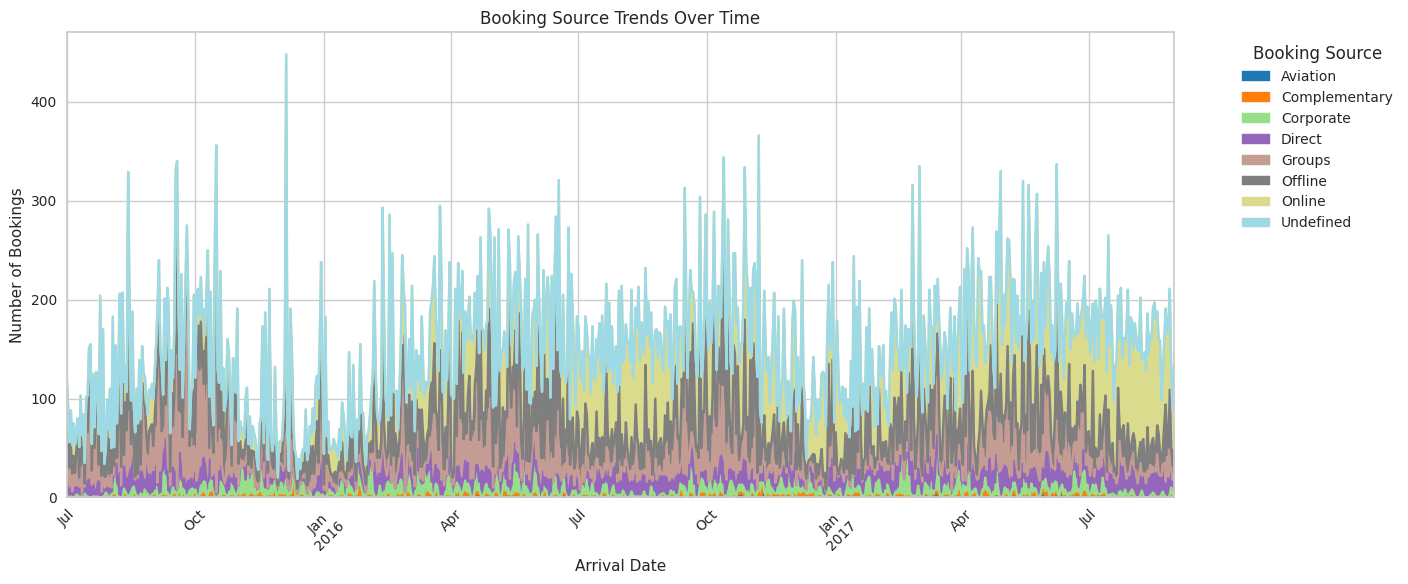

In [36]:
# let's visualize the Booking source trend over time

booking_source_data = data2.groupby(['arrival_date', 'market_segment'])['Booking_ID'].count().unstack()
plt.figure(figsize=(12, 6))
booking_source_data.plot.area(stacked=True, cmap='tab20', ax=plt.gca())
plt.title('Booking Source Trends Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.legend(title='Booking Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Relation between feature & target

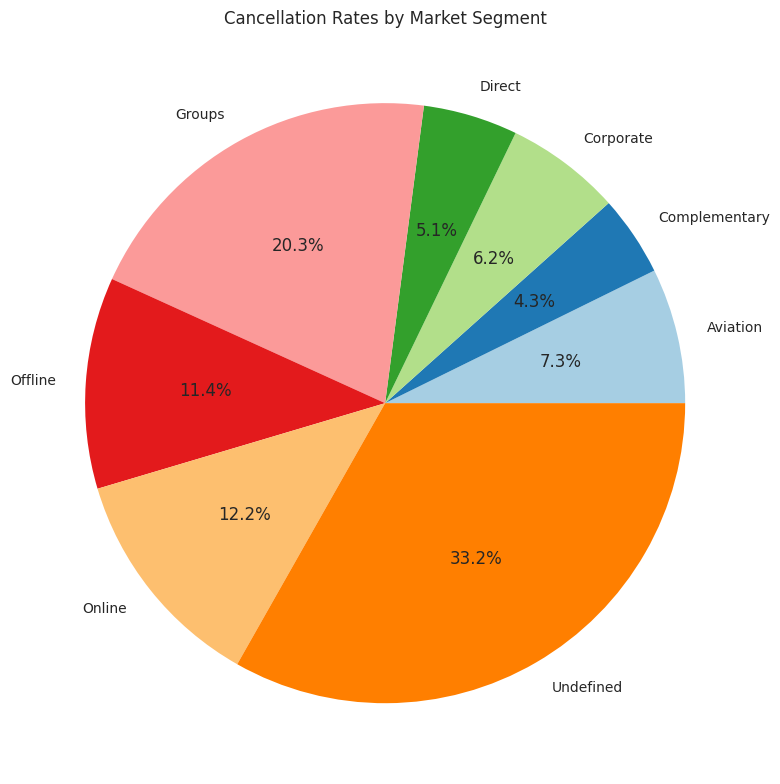

In [37]:
# let's visualize how different market segments affects booking cancellation

cancellation_data = data2.groupby('market_segment')['is_canceled'].mean() * 100
plt.figure(figsize=(8, 8))
plt.pie(cancellation_data, labels=cancellation_data.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(cancellation_data)))
)
plt.title('Cancellation Rates by Market Segment')
plt.axis('equal')  
plt.tight_layout()
plt.show()

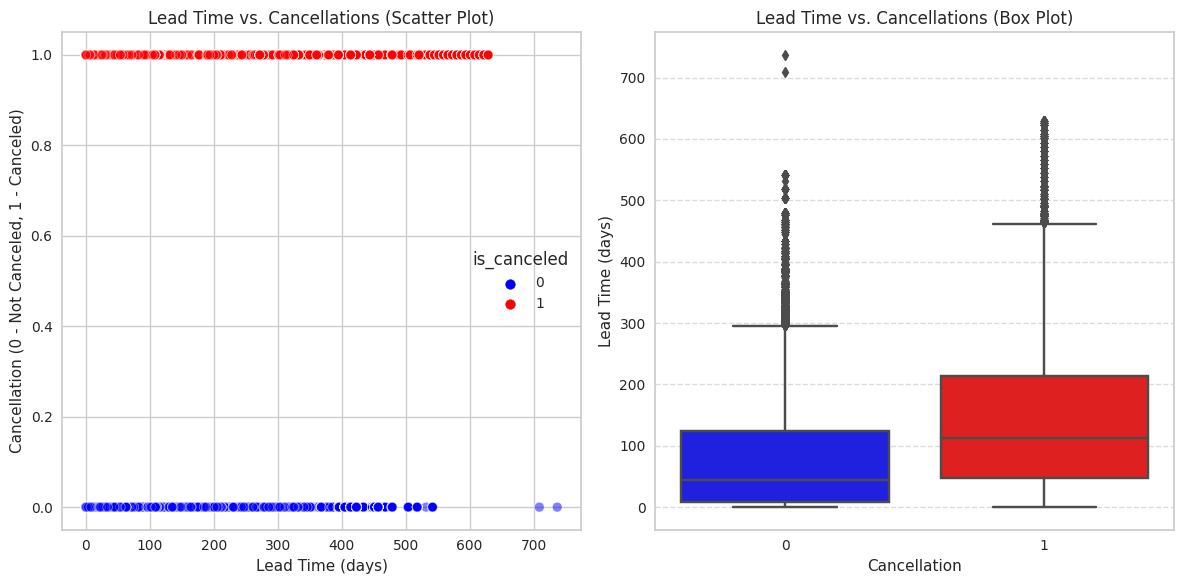

In [38]:
# let's vizualize the lead time (the number of days between booking and arrival) correlates with cancellations

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.scatterplot(x='lead_time', y='is_canceled', data=data2, hue='is_canceled', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Lead Time vs. Cancellations (Scatter Plot)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (0 - Not Canceled, 1 - Canceled)')
plt.grid(True)

plt.subplot(122)
sns.boxplot(x='is_canceled', y='lead_time', data=data2, palette={0: 'blue', 1: 'red'})
plt.title('Lead Time vs. Cancellations (Box Plot)')
plt.xlabel('Cancellation')
plt.ylabel('Lead Time (days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Longer Lead Time for Cancellations:** It seems that bookings with longer lead times are more likely to be canceled. This might suggest that guests are more likely to cancel their reservations when they book well in advance.

* **Shorter Lead Time for Non-Cancellations:** Bookings with shorter lead times (closer to the arrival date) are less likely to be canceled. Guests may be more committed to their stays when booking closer to the arrival date.

* **Overlap in Lead Time:** There is an overlap in lead times between not canceled and canceled bookings, indicating that lead time alone is not the sole factor determining cancellations.

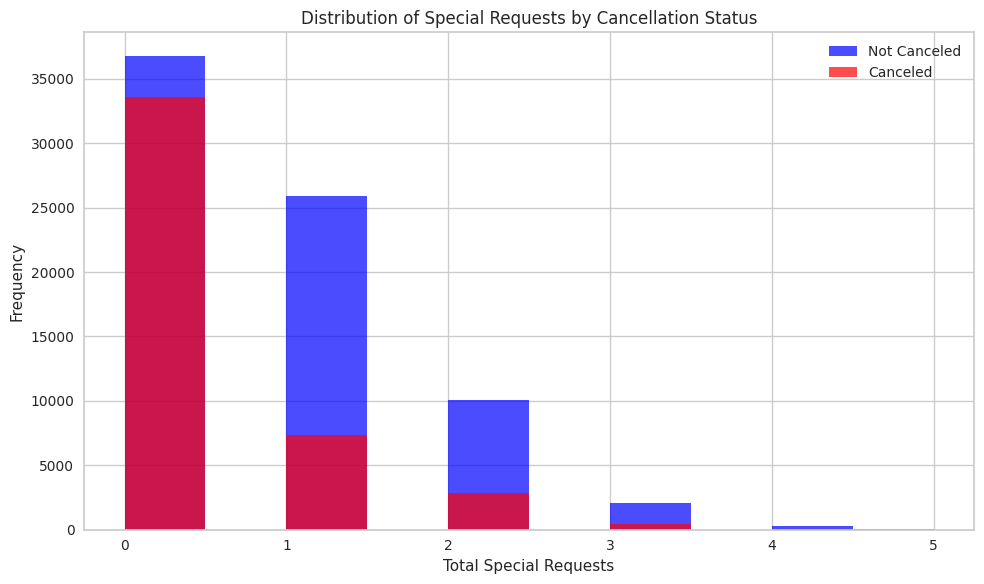

In [39]:
# lets's visualize whether the number of special requests influences cancellations.

plt.figure(figsize=(10, 6))
plt.hist(data2[data2['is_canceled'] == 0]['total_of_special_requests'], bins=10, color='blue', alpha=0.7, label='Not Canceled')
plt.hist(data2[data2['is_canceled'] == 1]['total_of_special_requests'], bins=10, color='red', alpha=0.7, label='Canceled')
plt.title('Distribution of Special Requests by Cancellation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

* The highest frequency occurs when there are 0 special requests, indicating that a substantial number of bookings (both not canceled and canceled) do not involve any special requests. This suggests that many guests do not make additional special requests.

* As the number of special requests increases, the frequency of bookings decreases. For example, there are fewer bookings with 1 special request compared to 0, and even fewer with 2 special requests, and so on. This indicates that as the number of special requests increases, the bookings become less common.

* The histograms show that for each number of special requests, the frequency of canceled bookings is generally lower than that of not canceled bookings. For example, in the case of 1 special request, there are around 25,000 not canceled bookings and around 7,500 canceled bookings. This suggests that guests who make special requests are less likely to cancel their bookings.

* The data suggests that special requests might have a positive impact on the likelihood of a booking being fulfilled (not canceled). Guests who make special requests may have specific preferences or needs that the hotel accommodates, resulting in a higher commitment to the booking.

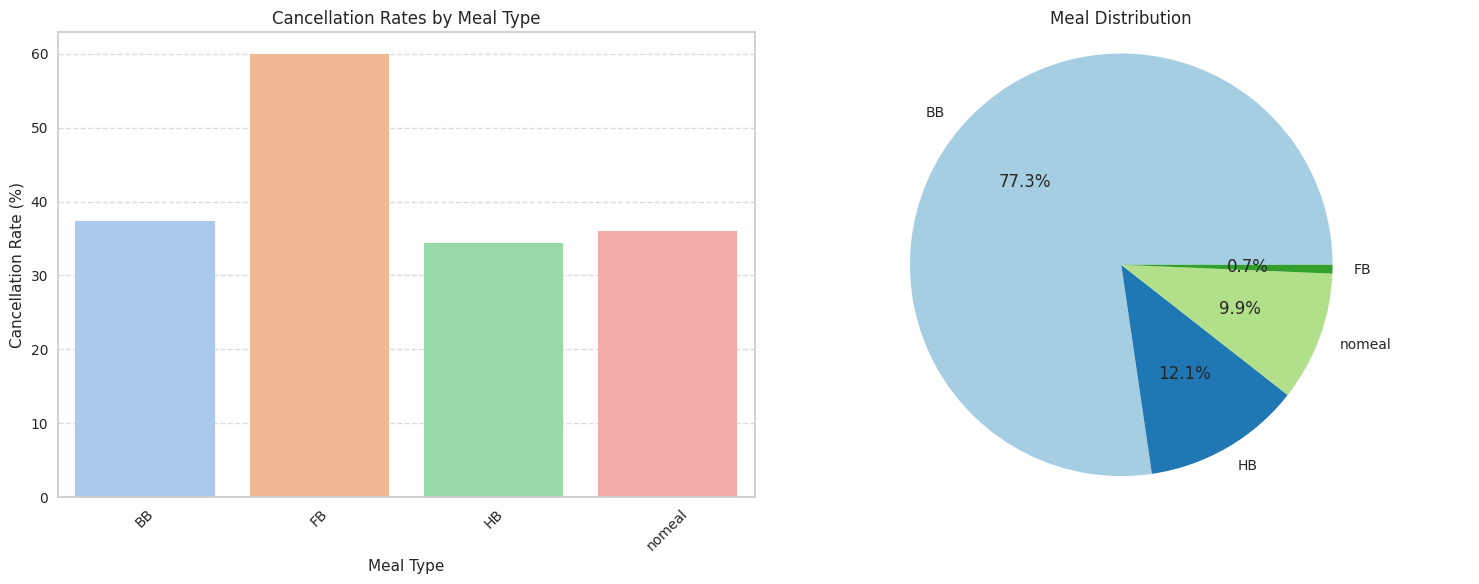

In [40]:
# let's visualize cancellation rates based on the meal type chosen by guests

cancellation_data = data2.groupby('meal')['is_canceled'].mean() *100
#distribution of meal types
meal_distribution = data2['meal'].value_counts()

plt.figure(figsize=(15, 6))
#bar plot
plt.subplot(121)
sns.barplot(x=cancellation_data.index, y=cancellation_data, palette='pastel')
plt.title('Cancellation Rates by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

#pie plot
plt.subplot(122)
plt.pie(meal_distribution, labels=meal_distribution.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(cancellation_data)))
)
plt.title('Meal Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

**Cancellation Rates by Meal Type:**
* Full Board (FB) has the highest cancellation rate at 60%. This suggests that guests who opt for a meal plan that includes all meals (breakfast, lunch, and dinner) are more likely to cancel their bookings.
* Half Board (HB) has the lowest cancellation rate among the options at 35%. This suggests that guests who select a meal plan that includes breakfast and one other meal, often dinner, are less likely to cancel their bookings. 


**Meal Distribution:**
* Bed & Breakfast (BB) meal type is preferred choice among guests, accounting for 77.3% of bookings. This suggests that the      majority of guests prefer a meal plan that includes breakfast, but they may have the flexibility to choose other dining options for lunch and dinner.
* The high percentage of Bed & Breakfast (BB) selections indicates that guests value flexibility and convenience in their meal plans. They have the option to start their day with breakfast at the accommodation while having the freedom to explore other dining options for the rest of the day.
* Full Board (FB) meal type is chosen by only 0.7% of guests in this distribution.This suggests that it is the least preferred choice among guests in this dataset.

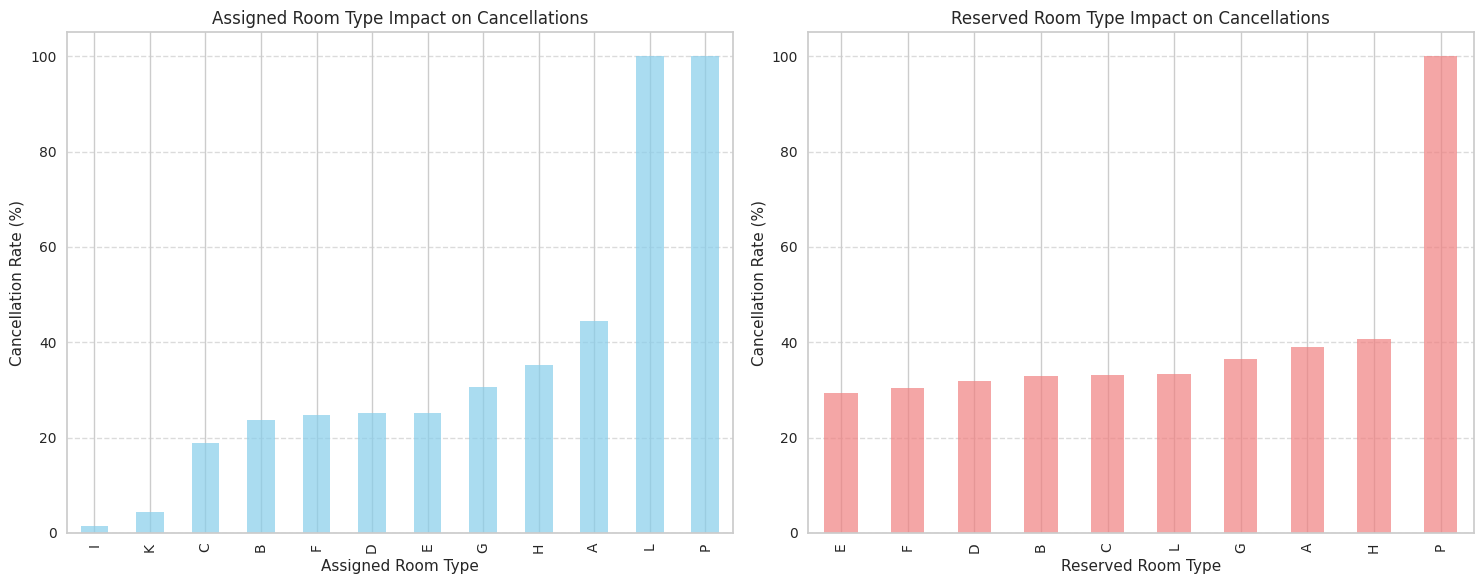

In [41]:
# Let's vizualize if the assigned and reserved room types affect cancellations

plt.figure(figsize=(15, 6))
plt.subplot(121)
assigned_room_type_counts = data2.groupby('assigned_room_type')['is_canceled'].mean() * 100
assigned_room_type_counts.sort_values().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Assigned Room Type Impact on Cancellations')
plt.xlabel('Assigned Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(122)
reserved_room_type_counts = data2.groupby('reserved_room_type')['is_canceled'].mean() * 100
reserved_room_type_counts.sort_values().plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Reserved Room Type Impact on Cancellations')
plt.xlabel('Reserved Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Note:** Only taking top four data.

**Assigned Room Type Impact on Cancellations:**

* P and L Room Types: The room types 'P' and 'L' have the highest cancellation rates, with 'L' having a 100% cancellation rate, indicating that all bookings with this room type were canceled. 'P' also has a very high cancellation rate.
* A Room Type: The room type 'A' has a around 45% cancellation rate, which is relatively high. This suggests that guests assigned to room type 'A' are more likely to cancel their bookings.
* H Room Type: The room type 'H' has a around 30% cancellation rate, which is moderate compared to 'P,' 'L,' and 'A.'

**Reserved Room Type Impact on Cancellations:**

* P Room Type: The room type 'P' has a 100% cancellation rate, indicating that all bookings with this room type as the reserved room type were canceled.
* H Room Type: The room type 'H' also has a relatively high cancellation rate at 40%.
* A Room Type: The room type 'A' has a 38% cancellation rate, which is moderately high.
* G Room Type: The room type 'G' has a 36% cancellation rate, indicating a significant portion of bookings with this room type as the reserved room type were canceled.

### Outliers 

In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Booking_ID                      119390 non-null  object        
 1   adults                          119390 non-null  int64         
 2   children                        119386 non-null  float64       
 3   babies                          119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   meal                            119390 non-null  object        
 7   required_car_parking_spaces     119390 non-null  int64         
 8   assigned_room_type              119390 non-null  object        
 9   lead_time                       119390 non-null  int64         
 10  arrival_date_year               119390 non-null  int64  

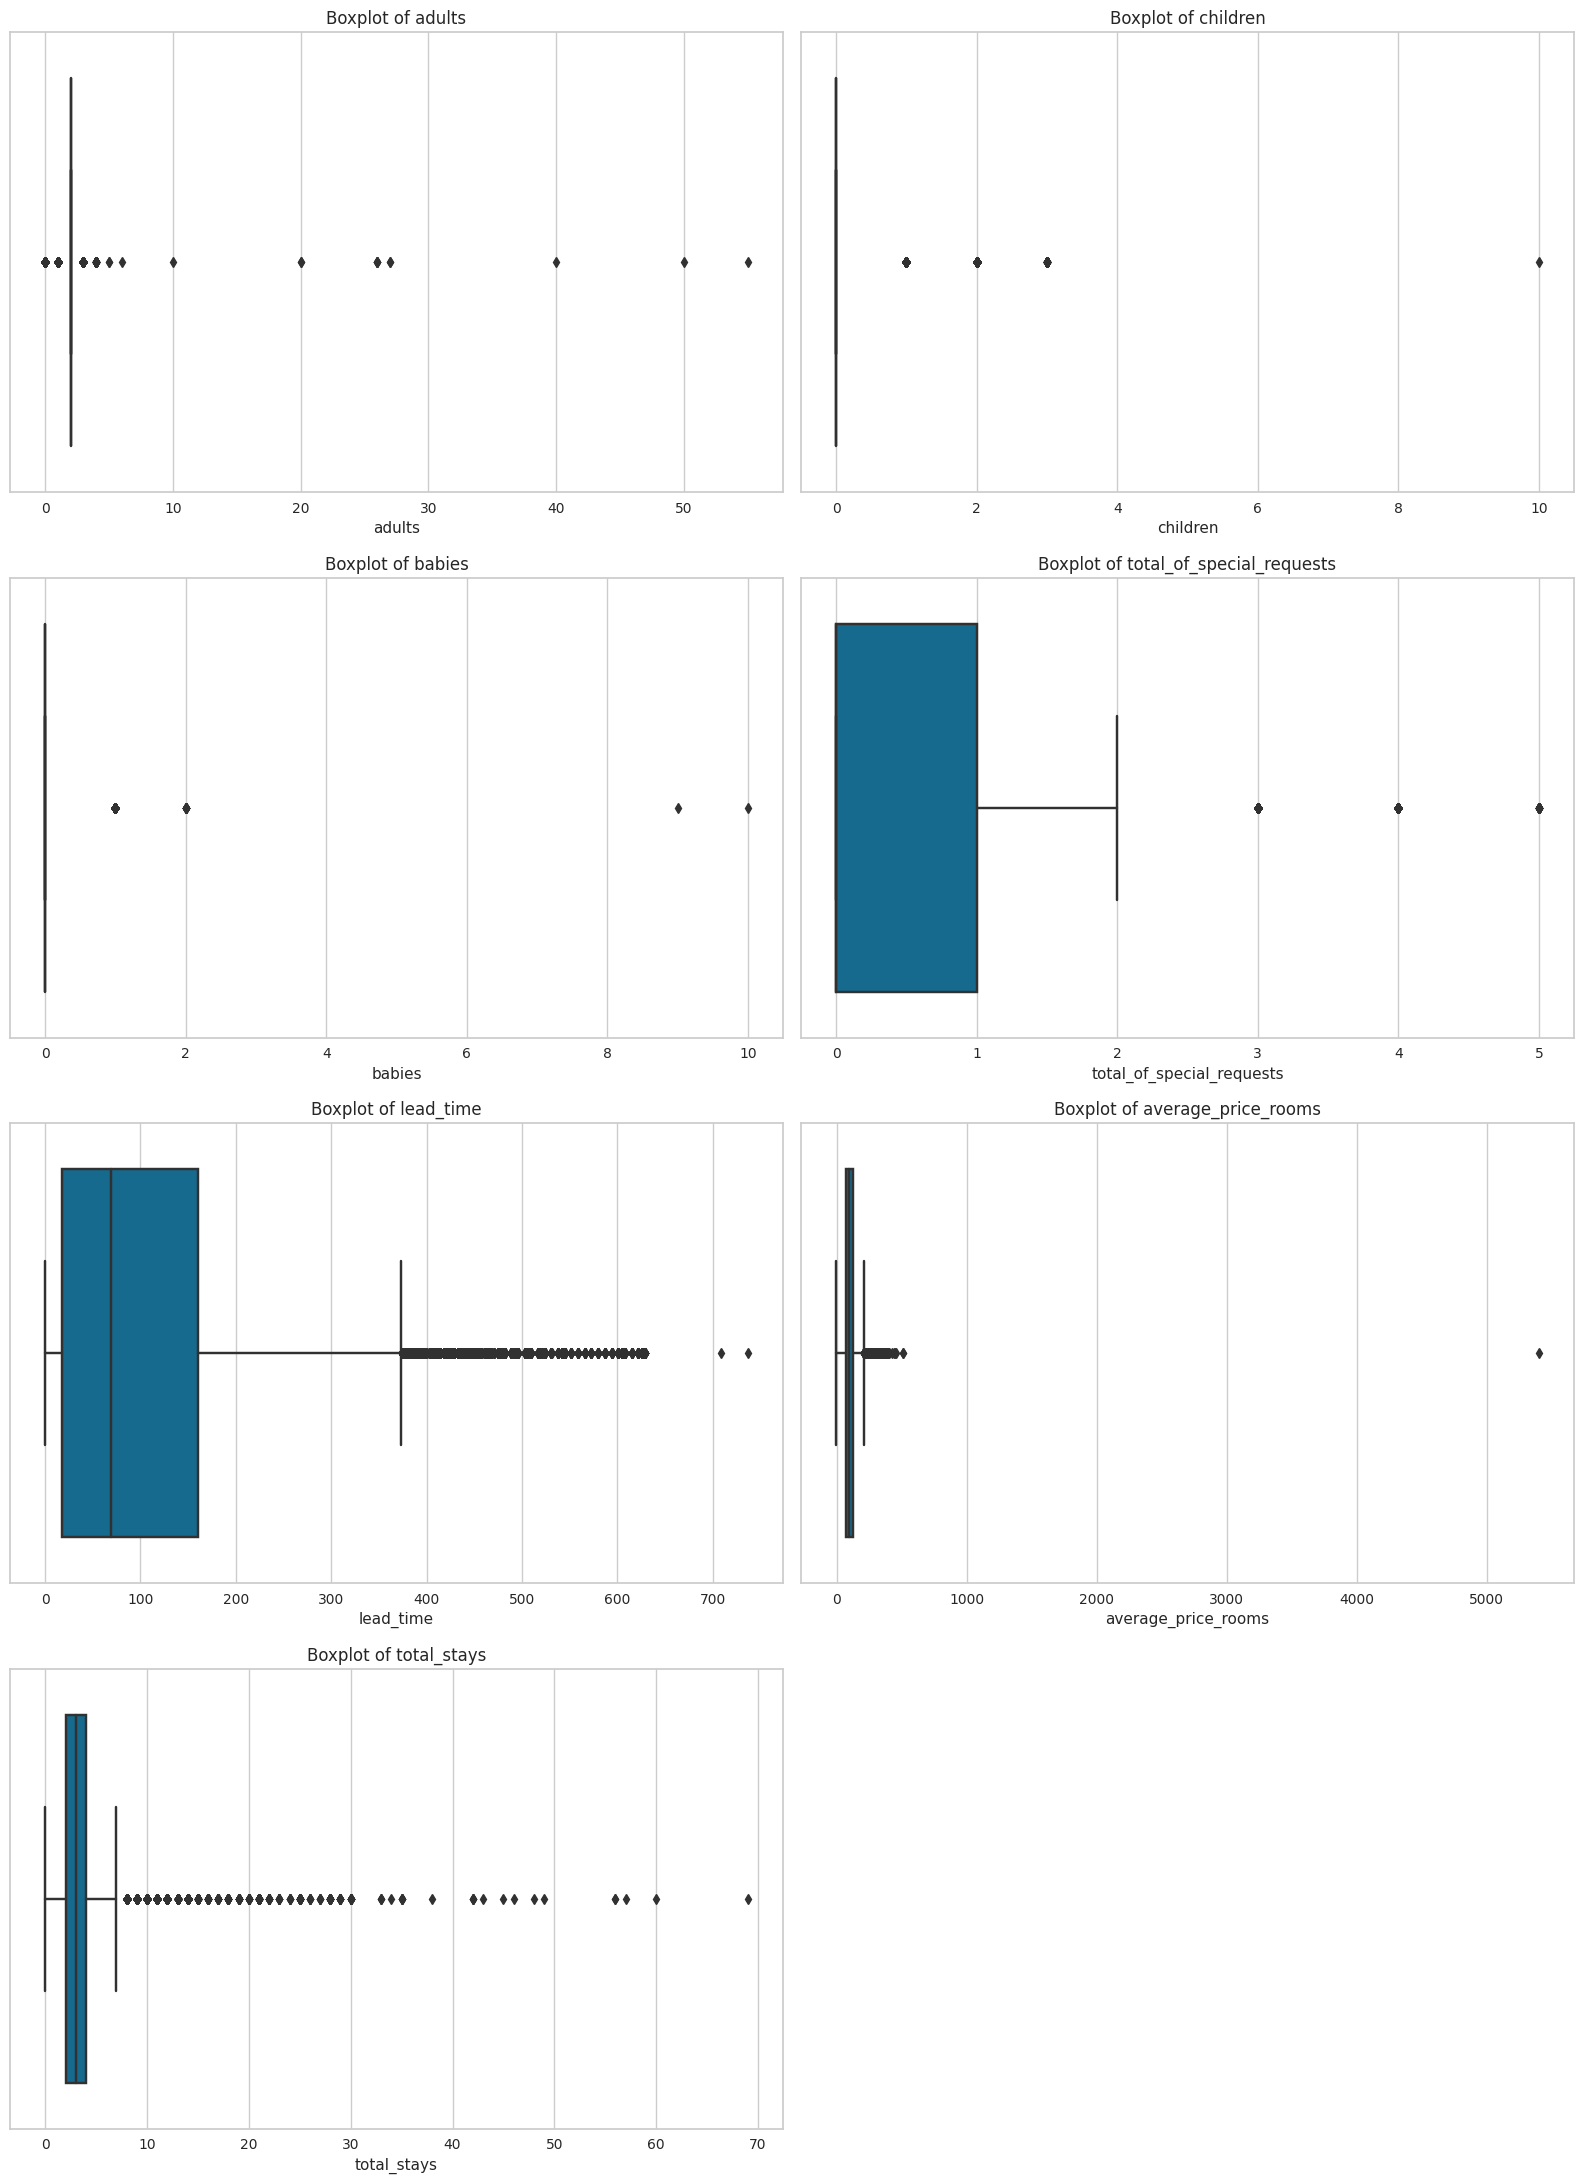

In [43]:
# Checking outliers in dataset

columns_for_boxplot = [
    'adults', 'children', 'babies', 'total_of_special_requests',
    'lead_time',
    'average_price_rooms',
    'total_stays',
]

plt.figure(figsize=(16, 22))
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data2, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [44]:
print('Dataset shape with outliers: ',data2.shape)

Dataset shape with outliers:  (119390, 24)


In [45]:
data3 = data2.copy()

In [46]:
# Removing Outliers

for column in columns_for_boxplot:
    q_low = data3[column].quantile(0.25) # Calculate percentiles
    q_hi  = data3[column].quantile(0.75)
    
    IQR=q_hi-q_low

    # Filter out outliers
    data3=data3[~((data3[column]<(q_low-1.5*IQR)) | (data3[column]>(q_hi+1.5*IQR)))]

In [47]:
print('Dataset shape without outliers: ',data3.shape)

Dataset shape without outliers:  (72194, 24)


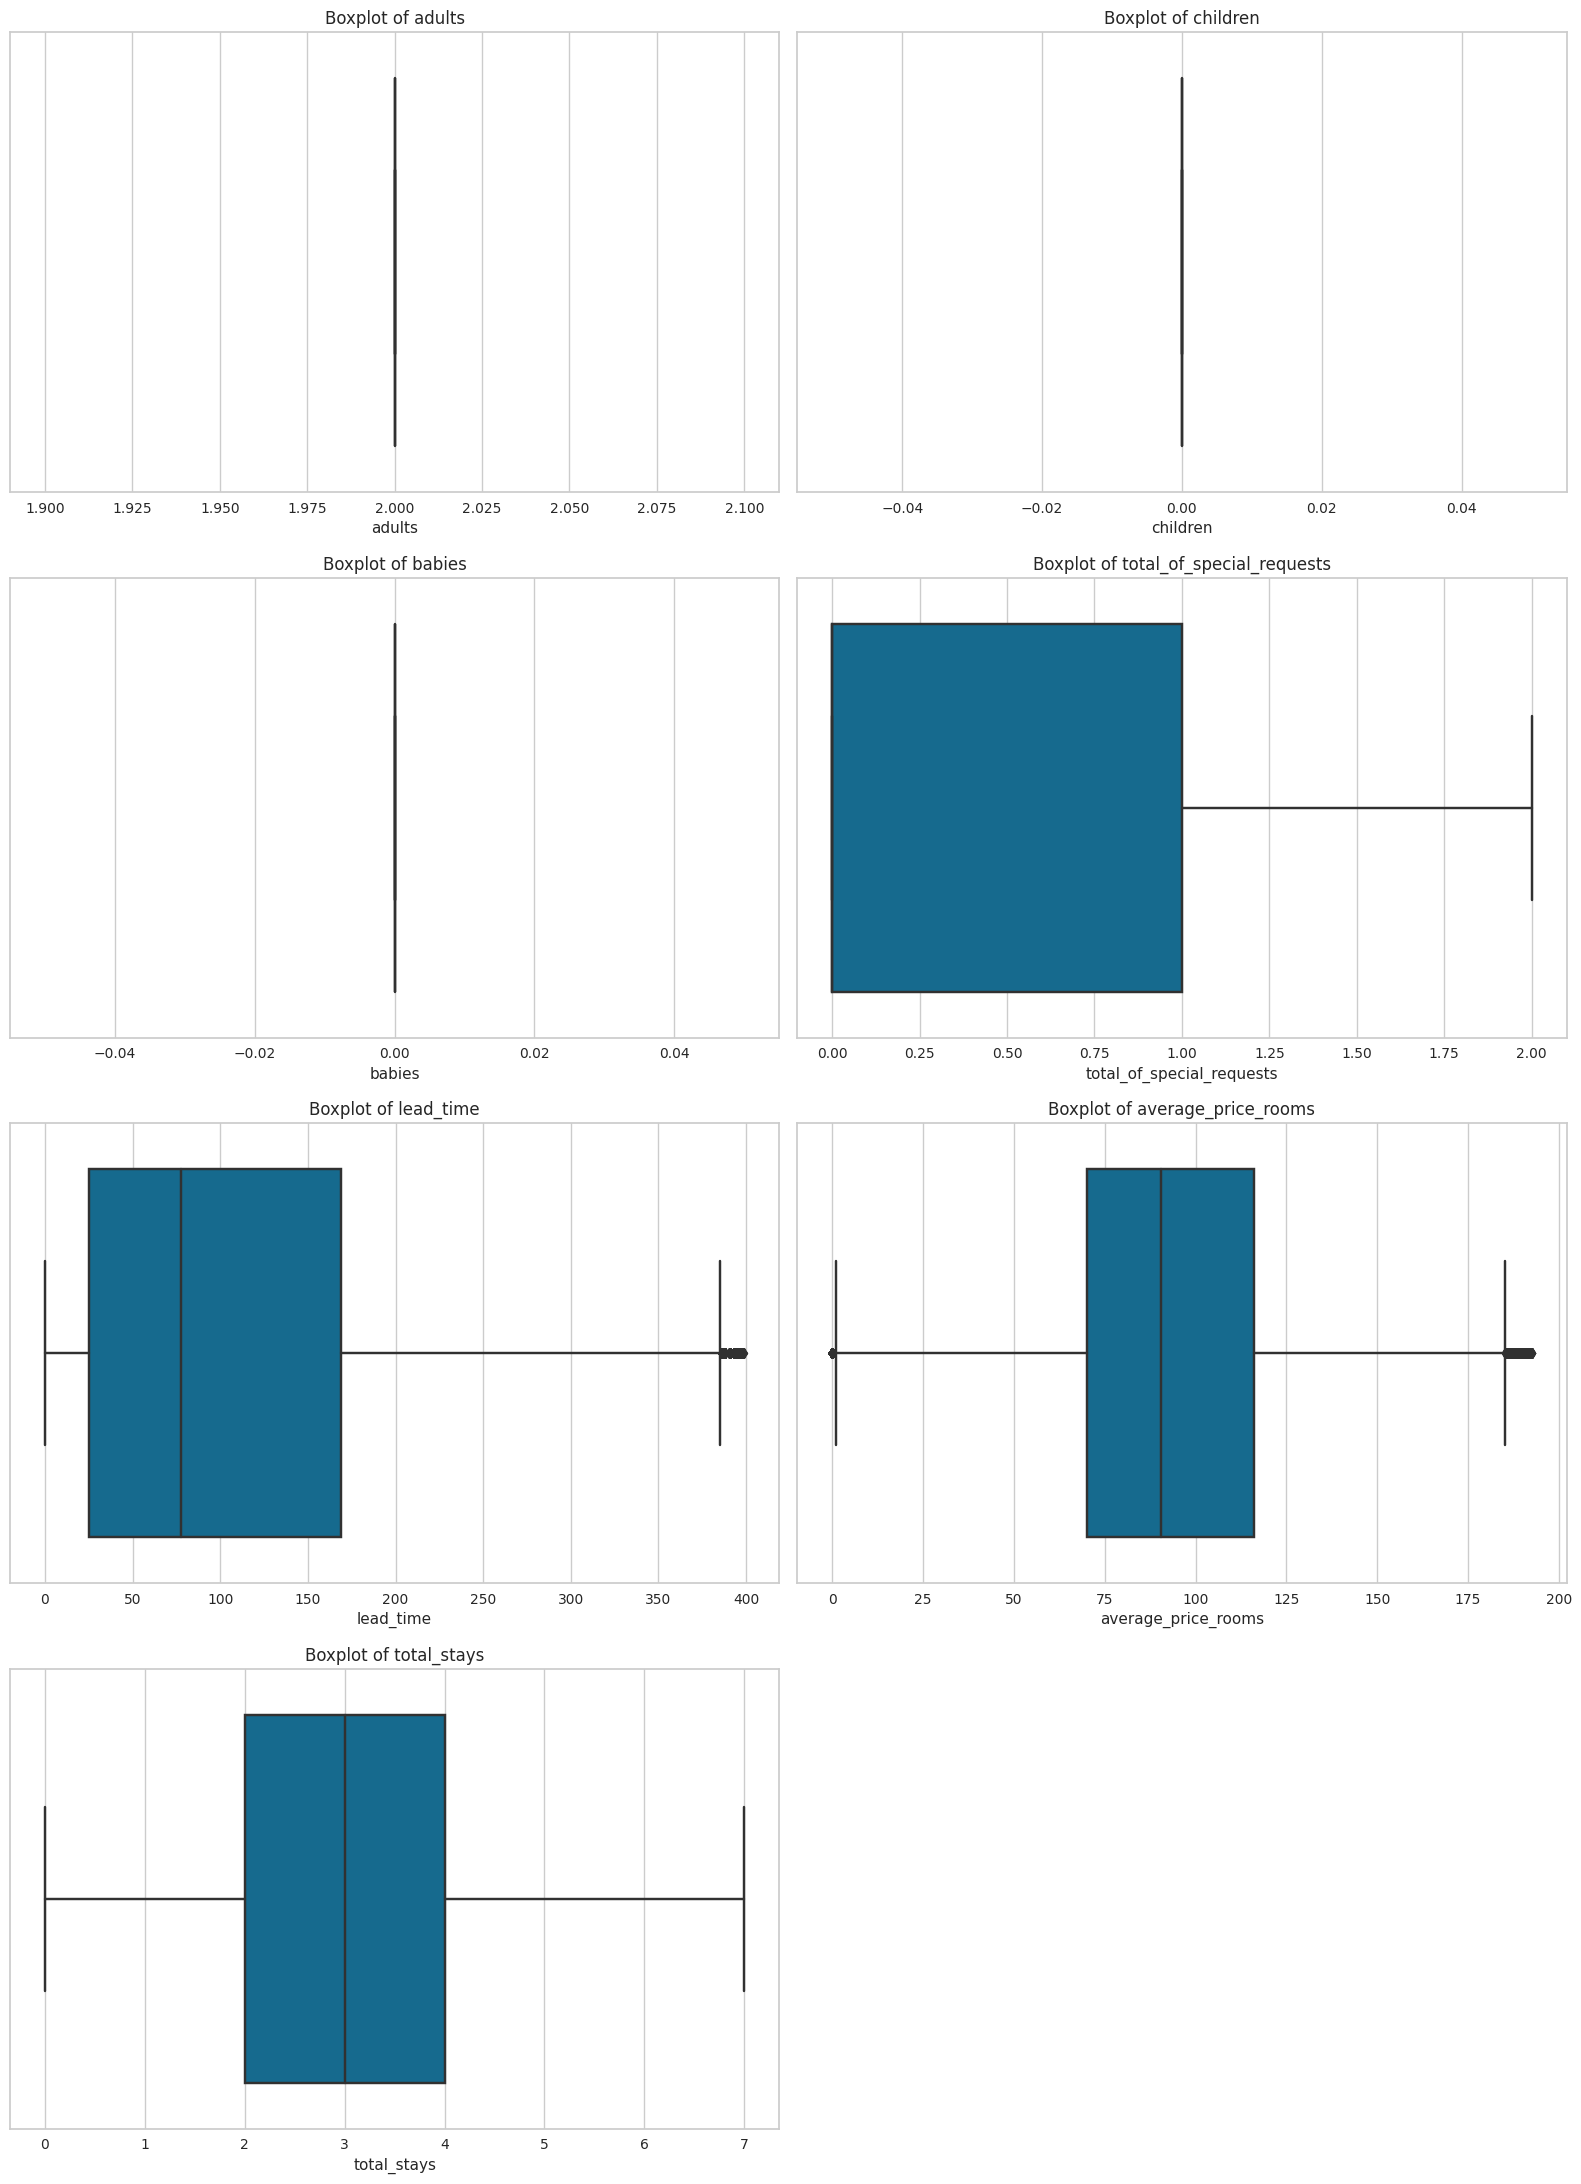

In [48]:
# box plot to visualize after removing the outliers

plt.figure(figsize=(16, 22))
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data3, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [49]:
data3.head()

Booking_ID  adults  children  babies  stays_in_weekend_nights  \
0   INN00001       2       0.0       0                        0   
4   INN00005       2       0.0       0                        0   
5   INN00006       2       0.0       0                        0   
6   INN00007       2       0.0       0                        0   
7   INN00008       2       0.0       0                        0   

   stays_in_week_nights meal  required_car_parking_spaces assigned_room_type  \
0                     0   BB                            0                  C   
4                     2   BB                            0                  A   
5                     2   BB                            0                  A   
6                     2   BB                            0                  C   
7                     2   FB                            0                  C   

   lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  \
0        342               2015                 07                        27   
4         14               2015                 07                        27   
5         14               2015                 07                        27   
6          0               2015                 07                        27   
7          9               2015                 07                        27   

   arrival_date_day_of_month market_segment reserved_room_type  \
0                          1         Direct                  C   
4                          1         Online                  A   
5                          1         Online                  A   
6                          1         Direct                  C   
7                          1         Direct                  C   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
4                  0                       0                               0   
5                  0                       0                               0   
6                  0                       0                               0   
7                  0                       0                               0   

   total_of_special_requests  average_price_rooms  is_canceled arrival_date  \
0                          0                  0.0            0   2015-07-01   
4                          1                 98.0            0   2015-07-01   
5                          1                 98.0            0   2015-07-01   
6                          0                107.0            0   2015-07-01   
7                          1                103.0            0   2015-07-01   

   total_stays  
0            0  
4            2  
5            2  
6            2  
7            2

**Now we have some of the features which will be not used in the model so let's drop them.**
* Features need to be dropped are: Booking_ID, stays_in_weekend_nights & stays_in_week_nights(we already have created a new feature combining the is 'total_stay'), arrival_date_year, arrival_date_month, arrival_date_day_of_month, arrival_date_week_number, arrival_date.

In [50]:
data4 = data3.copy()

In [51]:
data4 = data4.drop(['adults','babies','children', 'Booking_ID', 'stays_in_weekend_nights','stays_in_week_nights','arrival_date_year','arrival_date','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number'], axis =1)

In [52]:
data4 = data4.reset_index(drop=True)


In [53]:
data4

meal  required_car_parking_spaces assigned_room_type  lead_time  \
0       BB                            0                  C        342   
1       BB                            0                  A         14   
2       BB                            0                  A         14   
3       BB                            0                  C          0   
4       FB                            0                  C          9   
...    ...                          ...                ...        ...   
72189   BB                            0                  A        188   
72190   BB                            0                  A        164   
72191   BB                            0                  A         21   
72192   BB                            0                  A         23   
72193   BB                            0                  A        109   

      market_segment reserved_room_type  is_repeated_guest  \
0             Direct                  C                  0   
1             Online                  A                  0   
2             Online                  A                  0   
3             Direct                  C                  0   
4             Direct                  C                  0   
...              ...                ...                ...   
72189         Direct                  A                  0   
72190        Offline                  A                  0   
72191        Offline                  A                  0   
72192        Offline                  A                  0   
72193         Online                  A                  0   

       previous_cancellations  previous_bookings_not_canceled  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
72189                       0                               0   
72190                       0                               0   
72191                       0                               0   
72192                       0                               0   
72193                       0                               0   

       total_of_special_requests  average_price_rooms  is_canceled  \
0                              0                 0.00            0   
1                              1                98.00            0   
2                              1                98.00            0   
3                              0               107.00            0   
4                              1               103.00            0   
...                          ...                  ...          ...   
72189                          0                99.00            0   
72190                          0                87.60            0   
72191                          2                96.14            0   
72192                          0                96.14            0   
72193                          0               104.40            0   

       total_stays  
0                0  
1                2  
2                2  
3                2  
4                2  
...            ...  
72189            5  
72190            6  
72191            7  
72192            7  
72193            7  

[72194 rows x 13 columns]

Great! We have drop unnecessary column which is of no use to the model, Now we will do encoding of categorical variables but before that we will split our data in test and training set.

In [54]:
X = data4.drop(['is_canceled'], axis =1)
y = data4['is_canceled']

In [55]:
X

meal  required_car_parking_spaces assigned_room_type  lead_time  \
0       BB                            0                  C        342   
1       BB                            0                  A         14   
2       BB                            0                  A         14   
3       BB                            0                  C          0   
4       FB                            0                  C          9   
...    ...                          ...                ...        ...   
72189   BB                            0                  A        188   
72190   BB                            0                  A        164   
72191   BB                            0                  A         21   
72192   BB                            0                  A         23   
72193   BB                            0                  A        109   

      market_segment reserved_room_type  is_repeated_guest  \
0             Direct                  C                  0   
1             Online                  A                  0   
2             Online                  A                  0   
3             Direct                  C                  0   
4             Direct                  C                  0   
...              ...                ...                ...   
72189         Direct                  A                  0   
72190        Offline                  A                  0   
72191        Offline                  A                  0   
72192        Offline                  A                  0   
72193         Online                  A                  0   

       previous_cancellations  previous_bookings_not_canceled  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
72189                       0                               0   
72190                       0                               0   
72191                       0                               0   
72192                       0                               0   
72193                       0                               0   

       total_of_special_requests  average_price_rooms  total_stays  
0                              0                 0.00            0  
1                              1                98.00            2  
2                              1                98.00            2  
3                              0               107.00            2  
4                              1               103.00            2  
...                          ...                  ...          ...  
72189                          0                99.00            5  
72190                          0                87.60            6  
72191                          2                96.14            7  
72192                          0                96.14            7  
72193                          0               104.40            7  

[72194 rows x 12 columns]

In [56]:
y

0        0
1        0
2        0
3        0
4        0
        ..
72189    0
72190    0
72191    0
72192    0
72193    0
Name: is_canceled, Length: 72194, dtype: int64

In [57]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)


In [58]:
y_train.value_counts()

is_canceled
0    34814
1    22941
Name: count, dtype: int64

* Since we have an imbalanced dataset with significantly more instances of class 0 (not canceled) than class 1 (canceled). In such cases, the machine learning algorithm may become biased towards the majority class (class 0).
* Training a model on imbalanced data without addressing the class imbalance might result in poor performance. The model may predict the majority class well but perform poorly on the minority class.
* So Here oversampling the minority class (class 1) can help address the imbalance issue. It involves creating duplicate copies of instances from the minority class to balance the class distribution. 

**Note:** But here before applying any Oversmaplig method we need to convert categorical columns into numerical format.

In [59]:
encoder = TargetEncoder()
encoder.fit(X_train, y_train)

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [60]:
# # Create an instance of the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# # Fit and transform the encoder on your categorical data
# X_train_encoded = encoder.fit_transform(X_train[['meal', 'assigned_room_type', 'market_segment', 'reserved_room_type']])
# X_test_encoded = encoder.transform(X_test[['meal', 'assigned_room_type', 'market_segment', 'reserved_room_type']])

In [61]:
# Apply SMOTE to oversample the encoded training set

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
print("Class distribution in the training set after oversampling:")
print(y_train_resampled.value_counts())

Class distribution in the training set after oversampling:
is_canceled
0    34814
1    34814
Name: count, dtype: int64


* We can see data is balanced now as 0 & 1 has similar values counts.

Now, We will standardize the data, Standardization will help in model convergence

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

In [63]:
X_train_scaled.shape

(69628, 12)

### applying logistic regression

In [64]:


log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

**let's see how it performs on test data**

but before fit the test data into logistic regression we need to standardize the test data as we already have encoded test data as X_test_encoded. 

In [65]:
# function to scale the encoded test data

def test_data_preprocess(data):
    
    X_scaled = scaler.transform(data)
    return X_scaled
    
    
X_test_scaled = test_data_preprocess(X_test_encoded)

In [66]:
X_test_scaled.shape

(14439, 12)

In [67]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [68]:
def evaluation_metrics(test_y, pred_y):
    
    print('accuracy: ',accuracy_score(test_y, pred_y))
    conf_mat = confusion_matrix(test_y, pred_y)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    print('accuracy: ', (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative))
    Precision = true_positive/(true_positive+false_positive)
    print('Precision:', Precision)
    Recall = true_positive/(true_positive+false_negative)
    print('Recall: ', Recall)
    print('f2 score: ', 2*(Recall * Precision) / (Recall + Precision))
    # Area under curve
    print('AUC score: ', roc_auc_score(test_y, pred_y))




evaluation_metrics(y_test,y_pred_log_reg)

accuracy:  0.7314911004917238
accuracy:  0.7314911004917238
Precision: 0.7246912155142561
Recall:  0.8079794079794079
f2 score:  0.7640722935556502
AUC score:  0.7331904831033883


In [69]:
# ROC

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()


### applying decision tree 

In [70]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_resampled, y_train_resampled)
clf2.score(X_test_encoded, y_test)

0.8207632107486668

In [71]:
# decision classifier with scaling

clf3 = DecisionTreeClassifier()
clf3.fit(X_train_scaled, y_train_resampled)
clf3.score(X_test_scaled, y_test)

0.8213172657386245

### Xgboost 

In [72]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train_scaled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# cheking initial test accuracy
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy


0.8274118706281598

**let's use PCA for feature selection and see if it improves our accuracy.**


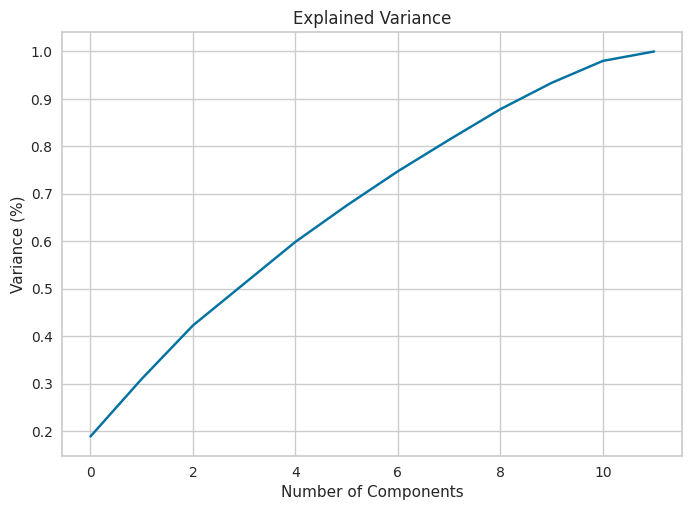

Decision Tree score:  0.8088510284645751
Random Forest score:  0.8387699979222938


In [74]:
# applying target encoder for categorical columns
encoder = TargetEncoder()
encoder.fit(X, y)
X_encoded = encoder.transform(X)

# scaling the data
x_transform = scaler.fit_transform(X_encoded)

# applying PCA
from sklearn.decomposition import PCA
pca = PCA()
principalcomponent = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

#Let's use only 10 components as more than 95% of variance is explained by 10 components of data
pca = PCA(n_components=10)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(principal_x,y, test_size=0.20, random_state = 42)

# fitting the data into Decision tree
clf1 = DecisionTreeClassifier()
clf1.fit(x_train,y_train)
print('Decision Tree score: ',clf1.score(x_test,y_test))

# fitting the data into Random Forest
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
print('Random Forest score: ',rand_clf.score(x_test,y_test))

### Random Forest 

In [77]:
# checking the feature importance

columns = X.columns
feature_imp = pd.Series(rand_clf2.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                         0.300657
average_price_rooms               0.228765
total_of_special_requests         0.107182
market_segment                    0.086266
assigned_room_type                0.083142
total_stays                       0.057559
previous_cancellations            0.043812
meal                              0.031698
reserved_room_type                0.029944
required_car_parking_spaces       0.027642
previous_bookings_not_canceled    0.001789
is_repeated_guest                 0.001542
dtype: float64

In [76]:
rand_clf2 = RandomForestClassifier(random_state=6)
rand_clf2.fit(X_train_scaled, y_train_resampled)
rand_clf2.score(X_test_scaled, y_test)

0.848327446499065

In [88]:
y_pred = rand_clf2.predict(X_test_scaled)

We can see trees based algorithms have similar kind of score also we have applied PCA to reduce dimensionality but got the same results.

Great, let's go a head with Random forest and do some hyperparameter tuning and see if we can increase our accuracy more.

* Hyperparameters of Random forest classifier:

bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False

Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [79]:
# we are passing the different values for parameters
grid_param = {'criterion' : ['gini','entropy'],
             'max_depth' : range(2,20),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10),
             'n_estimators':[90,100,115,130]}

In [80]:
grid_search = GridSearchCV(estimator=rand_clf2,param_grid=grid_param,cv=2,n_jobs =-1,verbose = 2)

In [81]:
grid_search.fit(X_train_scaled, y_train_resampled)

Fitting 2 folds for each of 10368 candidates, totalling 20736 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   1.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_spli

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=2)

In [82]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [83]:
rand_clf3 = RandomForestClassifier(criterion= 'gini',
 max_depth = 19,
 #max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 90,random_state=6)

In [84]:
rand_clf3.fit(X_train_scaled, y_train_resampled)
rand_clf3.score(X_test_scaled, y_test)

0.8339220167601634

Our accuracy has not improved. So, we can say that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score. Here we have used only cv=2 however we can go a head with atleast cv=5, that's why it is showing less result. 

0.8339220167601634

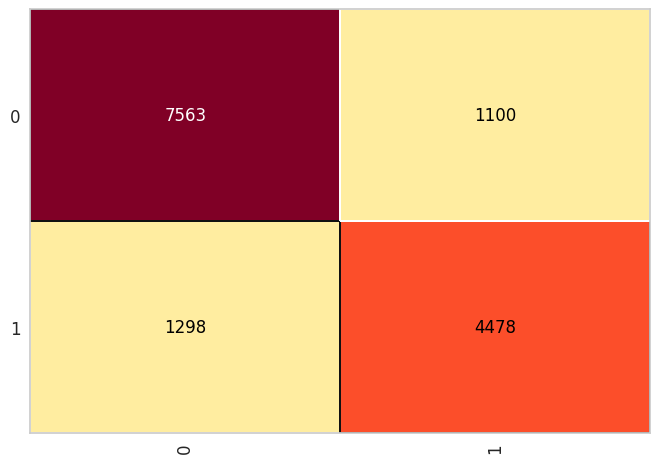

In [86]:
cm = ConfusionMatrix(rand_clf3)
cm.fit(X_train_scaled, y_train_resampled)
cm.score(X_test_scaled, y_test)

In [91]:
classification_random = (classification_report(y_test, y_pred))
print(classification_random)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8663
           1       0.82      0.79      0.81      5776

    accuracy                           0.85     14439
   macro avg       0.84      0.84      0.84     14439
weighted avg       0.85      0.85      0.85     14439



In [92]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy,2)}

In [95]:
get_metrics(y_test, y_pred, y_pred_prob)

{'accuracy': 0.85, 'precision': 0.82, 'recall': 0.79, 'entropy': 0.36}

In [93]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

predict_prob_on_test_data(rand_clf3, X_test_scaled)

array([[0.18690904, 0.81309096],
       [0.67903205, 0.32096795],
       [0.08019818, 0.91980182],
       ...,
       [0.74914824, 0.25085176],
       [0.76661124, 0.23338876],
       [0.73489274, 0.26510726]])

In [94]:
y_pred_prob = predict_prob_on_test_data(rand_clf3,X_test_scaled)

# END